# Leitura da base:

In [435]:
from pathlib import Path
import pandas as pd

# ============================================================
# ROOT DO PROJETO (notebook dentro de /notebooks)
# ============================================================
PROJECT_ROOT = Path.cwd().parent

# ============================================================
# CONTEXTO DO DESAFIO
# ============================================================
CHALLENGE_NAME = "desafio_02"

# ============================================================
# CAMINHO DO ARQUIVO RAW
# ============================================================
DATA_RAW_DIR = PROJECT_ROOT / "data" / CHALLENGE_NAME / "raw"
RAW_FILE_PATH = DATA_RAW_DIR / "base_case.csv"

RAW_FILE_PATH


WindowsPath('c:/Users/ggrinspun/Github/desafio-analise-de-credito/data/desafio_02/raw/base_case.csv')

In [436]:
df_base = pd.read_csv(
    RAW_FILE_PATH,
    sep="\t",
    encoding="utf-8"
)

print("Shape:", df_base.shape)
df_base.head()


Shape: (46522, 203)


,index,alvo,REF_DATE,PRODUTO,DIAS_ATRASO,col_4,col_5,col_6,col_7,col_8,...,col_192,col_193,col_194,col_195,col_196,col_197,col_198,col_199,col_200,REGIAO
0,0,0,2023-01-31,CREDITO PESSOAL,52,2461.11,30 a 60,0,0,0,...,0,2,NaN,MEDIO,NaN,3.0,-1.0,1.0,URBANO,NORTE
1,1,0,2022-12-29,CREDITO PESSOAL,37,4674.50,30 a 60,0,0,0,...,0,4,D,MEDIO,D,2.0,1.0,1.0,URBANO,NORDESTE
2,2,0,2023-09-29,CREDITO PESSOAL,36,43649.17,30 a 60,1,0,0,...,0,8,B,MUITO ALTO,B+,4.0,3.0,1.0,URBANO,SUDESTE
3,3,1,2023-02-28,CREDITO PESSOAL,48,1090.58,30 a 60,0,0,0,...,0,1,C,BAIXO,C-,4.0,-4.0,0.0,URBANO,SUDESTE
4,4,0,2023-02-28,CREDITO PESSOAL,34,1495.49,30 a 60,0,0,0,...,0,3,C,MEDIO,C,4.0,-1.0,1.0,URBANO,SUDESTE


# Visão geral da base de dados

In [437]:
import pandas as pd

print("Shape:", df_base.shape)
print(df_base.head(3))
print(df_base.info())

Shape: (46522, 203)
   index  alvo    REF_DATE          PRODUTO  DIAS_ATRASO     col_4    col_5  \
0      0     0  2023-01-31  CREDITO PESSOAL           52   2461.11  30 a 60   
1      1     0  2022-12-29  CREDITO PESSOAL           37   4674.50  30 a 60   
2      2     0  2023-09-29  CREDITO PESSOAL           36  43649.17  30 a 60   

   col_6  col_7  col_8  ...  col_192  col_193  col_194     col_195  col_196  \
0      0      0      0  ...        0        2      NaN       MEDIO      NaN   
1      0      0      0  ...        0        4        D       MEDIO        D   
2      1      0      0  ...        0        8        B  MUITO ALTO       B+   

   col_197  col_198  col_199  col_200    REGIAO  
0      3.0     -1.0      1.0   URBANO     NORTE  
1      2.0      1.0      1.0   URBANO  NORDESTE  
2      4.0      3.0      1.0   URBANO   SUDESTE  

[3 rows x 203 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46522 entries, 0 to 46521
Columns: 203 entries, index to REGIAO
dtypes: 

In [438]:
TARGET = "alvo"  # ajuste se o nome for outro

print(df_base[TARGET].value_counts())
print(df_base[TARGET].value_counts(normalize=True).round(4))

alvo
0    40542
1     5980
Name: count, dtype: int64
alvo
0    0.8715
1    0.1285
Name: proportion, dtype: float64


In [439]:
num_cols = df_base.select_dtypes(include="number").columns.tolist()
cat_cols = df_base.select_dtypes(include=["object", "category"]).columns.tolist()

print("Numéricas:", len(num_cols))
print("Categóricas:", len(cat_cols))

cat_cols[:10]


Numéricas: 155
Categóricas: 48


['REF_DATE',
 'PRODUTO',
 'col_5',
 'col_79',
 'col_80',
 'col_81',
 'col_82',
 'col_83',
 'col_84',
 'col_85']

In [440]:
missing_rate = (
    df_base.isna().mean()
    .sort_values(ascending=False)
)

print(missing_rate.head(10))

col_180    0.964834
col_181    0.964834
col_160    0.929023
col_142    0.767250
col_116    0.752375
col_151    0.748678
col_121    0.703839
col_122    0.703044
col_113    0.692382
col_114    0.692382
dtype: float64


In [441]:
import numpy as np

missing_target_relation = {}

for col in missing_rate[missing_rate > 0].index[:10]:
    flag = df_base[col].isna().astype(int)
    missing_target_relation[col] = (
        df_base.groupby(flag)[TARGET].mean().to_dict()
    )

missing_target_relation


{'col_180': {0: 0.16198044009779952, 1: 0.1273225504611683},
 'col_181': {0: 0.16198044009779952, 1: 0.1273225504611683},
 'col_160': {0: 0.1408237431859479, 1: 0.12760296159185563},
 'col_142': {0: 0.1407462135205024, 1: 0.12483890850002802},
 'col_116': {0: 0.140625, 1: 0.12456431061082224},
 'col_151': {0: 0.13949709202873758, 1: 0.12486362331323572},
 'col_121': {0: 0.1404412832051096, 1: 0.12353408258001466},
 'col_122': {0: 0.14020991675714803, 1: 0.12361268230042499},
 'col_113': {0: 0.13933337991754594, 1: 0.12374654621092174},
 'col_114': {0: 0.13933337991754594, 1: 0.12374654621092174}}

In [442]:
df_base[num_cols].describe(percentiles=[.01, .05, .95, .99]).T.head(10)

,count,mean,std,min,1%,5%,50%,95%,99%,max
index,46522.0,23260.500000,13429.888948,0.00,465.2100,2326.050,23260.500,44194.9500,46055.7900,46521.00
alvo,46522.0,0.128541,0.334695,0.00,0.0000,0.000,0.000,1.0000,1.0000,1.00
DIAS_ATRASO,46522.0,45.232664,8.358060,31.00,31.0000,33.000,46.000,59.0000,60.0000,60.00
col_4,46522.0,5705.319267,14505.087222,0.76,89.4447,237.314,1823.965,23541.0175,77561.0352,294608.14
col_6,46522.0,0.272538,0.621192,0.00,0.0000,0.000,0.000,1.0000,3.0000,8.00
col_7,46522.0,0.003074,0.056129,0.00,0.0000,0.000,0.000,0.0000,0.0000,2.00
col_8,46522.0,0.000000,0.000000,0.00,0.0000,0.000,0.000,0.0000,0.0000,0.00
col_9,46522.0,0.000150,0.012266,0.00,0.0000,0.000,0.000,0.0000,0.0000,1.00
col_10,46522.0,0.017991,0.132922,0.00,0.0000,0.000,0.000,0.0000,1.0000,1.00
col_11,46522.0,0.142427,0.600622,0.00,0.0000,0.000,0.000,1.0000,3.0000,5.00


In [443]:
df_base["REF_DATE"] = pd.to_datetime(df_base["REF_DATE"], errors="coerce")

df_base["REF_DATE"].min(), df_base["REF_DATE"].max(), df_base["REF_DATE"].isna().mean()


(Timestamp('2022-11-30 00:00:00'),
 Timestamp('2023-11-30 00:00:00'),
 np.float64(0.0))

In [444]:
TARGET = "alvo"

tab_prod = df_base.groupby("PRODUTO")[TARGET].agg(["count", "mean"]).sort_values("mean", ascending=False)
tab_reg  = df_base.groupby("REGIAO")[TARGET].agg(["count", "mean"]).sort_values("mean", ascending=False)

tab_prod, tab_reg


(                 count      mean
 PRODUTO                         
 CREDITO PESSOAL  46522  0.128541,
               count      mean
 REGIAO                       
 CENTRO-OESTE   3679  0.148682
 SUL            5176  0.137172
 NORTE          2506  0.129290
 SUDESTE       21508  0.128882
 NORDESTE       9000  0.117889)

In [445]:
cat_cols = df_base.select_dtypes(include=["object","category"]).columns.tolist()

card = df_base[cat_cols].nunique(dropna=False).sort_values(ascending=False)
print(card.head(30))


col_196    16
col_181    15
col_158    13
col_171    13
col_79     12
col_81     12
col_80     12
col_86     12
col_83     12
col_85     12
col_84     12
col_82     12
col_168    11
col_194     6
REGIAO      6
col_172     6
col_178     6
col_145     5
col_143     5
col_147     5
col_146     5
col_154     5
col_144     5
col_184     5
col_185     5
col_121     4
col_122     4
col_117     4
col_118     4
col_119     4
dtype: int64


# Etapa 0 — Setup e “contrato” do dataset
Objetivo:

Travar invariantes do dataset e evitar inconsistências nas etapas seguintes de análise e modelagem.

In [446]:
import pandas as pd
import numpy as np

# Verificar existência da coluna index
assert "index" in df_base.columns, "Coluna 'index' não encontrada no dataset."

# Verificar duplicidade
total_registros = df_base.shape[0]
duplicados_index = df_base["index"].duplicated().sum()

total_registros, duplicados_index


(46522, np.int64(0))

In [447]:
# Verificar se o índice do pandas corresponde à coluna index
alinhado = (df_base.index.values == df_base["index"].values).all()

alinhado

np.True_

In [448]:
if duplicados_index > 0:
    df_base["REF_DATE"] = pd.to_datetime(df_base["REF_DATE"], errors="coerce")
    
    df_base = (
        df_base
        .sort_values("REF_DATE")
        .drop_duplicates(subset="index", keep="last")
        .reset_index(drop=True)
    )
df_base["index"].duplicated().sum()



np.int64(0)

A partir de agora, coluna index:

é única após validação; será utilizada apenas como identificador, não como feature.

In [449]:
# Definir a coluna index como índice do DataFrame
df_base = df_base.set_index("index")

df_base.index.is_unique


True

foi realizada a validação da integridade da chave identificadora do dataset. A coluna index, especificada como identificador único, foi analisada quanto à presença de duplicidades e ao alinhamento com o índice do DataFrame. Não foram identificadas inconsistências após o tratamento, e a coluna foi utilizada exclusivamente para rastreabilidade dos registros, não sendo considerada como variável explicativa nas etapas subsequentes.

# Etapa 1 — Separação de colunas por papel

Objetivo

Definir claramente o papel de cada coluna no dataset, separando variáveis explicativas, variáveis de controle e metadados, de modo a evitar vazamento de informação (data leakage) e facilitar as etapas posteriores de pré-processamento e modelagem.

In [450]:
TARGET = "alvo"

assert TARGET in df_base.columns, "Coluna alvo não encontrada no dataset."



In [451]:
TIME_COL = "REF_DATE"
ID_COL = df_base.index.name  # 'index'

In [452]:
df_base[TIME_COL] = pd.to_datetime(df_base[TIME_COL], errors="coerce")

df_base[TIME_COL].isna().mean()

np.float64(0.0)

In [453]:
cat_cols = df_base.select_dtypes(include=["object", "category"]).columns.tolist()
num_cols = df_base.select_dtypes(include=["number"]).columns.tolist()

cols_to_exclude = [TARGET, TIME_COL]

num_cols = [c for c in num_cols if c not in cols_to_exclude]
cat_cols = [c for c in cat_cols if c not in cols_to_exclude]


In [454]:
feature_cols = num_cols + cat_cols

len(feature_cols), len(num_cols), len(cat_cols)


(200, 153, 47)

In [455]:
summary_cols = pd.DataFrame({
    "coluna": df_base.columns,
    "tipo": df_base.dtypes.astype(str),
    "papel": [
        "target" if c == TARGET
        else "tempo" if c == TIME_COL
        else "feature"
        for c in df_base.columns
    ]
})

summary_cols["papel"].value_counts()


papel
feature    200
target       1
tempo        1
Name: count, dtype: int64

As variáveis do dataset foram classificadas de acordo com seu papel no processo de modelagem. A coluna alvo foi definida como variável dependente, enquanto a coluna REF_DATE foi reservada exclusivamente para controle temporal e validação fora da amostra, evitando vazamento de informação. As demais variáveis foram separadas em numéricas e categóricas, formando o conjunto de variáveis explicativas a ser utilizado nas etapas subsequentes de análise exploratória, tratamento e modelagem.

# Etapa 2 — EDA aprofundada: comportamento do alvo
Objetivo

Compreender o comportamento da inadimplência a partir de recortes relevantes para o negócio, priorizando análises que influenciam decisões de modelagem e interpretação do score.

In [456]:
inadimplencia_global = (
    df_base[TARGET]
    .value_counts(normalize=True)
    .rename("proporcao")
    .sort_index()
)

print(inadimplencia_global)


alvo
0    0.871459
1    0.128541
Name: proporcao, dtype: float64


Desbalanceamento Considerável, A proporção de aproximadamente 13% de maus pagadores indica a necessidade de métricas apropriadas para classificação desbalanceada (ex.: AUC, KS), bem como atenção à calibração e interpretação do score.

In [457]:
bins_atraso = [30, 40, 50, 60]
labels_atraso = ["31–40", "41–50", "51–60"]

df_base["FAIXA_ATRASO"] = pd.cut(
    df_base["DIAS_ATRASO"],
    bins=bins_atraso,
    labels=labels_atraso,
    right=True,
    include_lowest=True
)

inadimplencia_atraso = (
    df_base
    .groupby("FAIXA_ATRASO", observed=True)[TARGET]
    .agg(
        qtd_registros="count",
        taxa_inadimplencia="mean"
    )
)

print(inadimplencia_atraso)


              qtd_registros  taxa_inadimplencia
FAIXA_ATRASO                                   
31–40                 15595            0.150882
41–50                 16059            0.123109
51–60                 14868            0.110977


### Análise de colunas com baixo poder disciminativo

In [458]:
def dominant_rate(s: pd.Series) -> float:
    vc = s.value_counts(dropna=False, normalize=True)
    return float(vc.iloc[0])

dominance = pd.Series(
    {c: dominant_rate(df_base[c]) for c in df_base.columns if c != TARGET}
).sort_values(ascending=False)
dominance.head(30)


PRODUTO    1.000000
col_5      1.000000
col_8      1.000000
col_42     1.000000
col_40     1.000000
col_39     1.000000
col_38     1.000000
col_21     1.000000
col_17     1.000000
col_12     1.000000
col_46     1.000000
col_47     1.000000
col_37     1.000000
col_33     1.000000
col_34     1.000000
col_45     1.000000
col_44     1.000000
col_41     1.000000
col_35     1.000000
col_36     1.000000
col_43     1.000000
col_90     1.000000
col_96     1.000000
col_104    1.000000
col_103    1.000000
col_26     0.999957
col_9      0.999850
col_18     0.999828
col_191    0.999828
col_30     0.999807
dtype: float64

In [459]:
dominance_1_cols = dominance[dominance == 1.0].index.tolist()

dominance_1_summary = pd.DataFrame({
    "missing_rate": df_base[dominance_1_cols].isna().mean(),
    "unique_non_null": df_base[dominance_1_cols].nunique(dropna=True),
    "unique_including_nan": df_base[dominance_1_cols].nunique(dropna=False),
    "most_frequent_value": [
        df_base[c].value_counts(dropna=False).index[0] for c in dominance_1_cols
    ],
    "most_frequent_share": [
        df_base[c].value_counts(dropna=False, normalize=True).iloc[0] for c in dominance_1_cols
    ],
}).sort_values(["missing_rate", "unique_including_nan"], ascending=[False, True])

dominance_1_summary


,missing_rate,unique_non_null,unique_including_nan,most_frequent_value,most_frequent_share
PRODUTO,0.0,1,1,CREDITO PESSOAL,1.0
col_5,0.0,1,1,30 a 60,1.0
col_8,0.0,1,1,0,1.0
col_42,0.0,1,1,0,1.0
col_40,0.0,1,1,0,1.0
col_39,0.0,1,1,0,1.0
col_38,0.0,1,1,0,1.0
col_21,0.0,1,1,0,1.0
col_17,0.0,1,1,0,1.0
col_12,0.0,1,1,0,1.0


Todas as colunas analisadas apresentam o mesmo padrão:

- missing_rate = 0.0
- unique_non_null = 1
- unique_including_nan = 1
- most_frequent_share = 1.0

variáveis com dominância absoluta, apresentando um único valor válido em 100% dos registros. Essas colunas possuem variância nula e, portanto, não carregam qualquer informação discriminativa para o problema de classificação

In [460]:
# Colunas com variância nula (dominância absoluta)
cols_drop_variancia_nula = dominance_1_summary.index.tolist()

len(cols_drop_variancia_nula), cols_drop_variancia_nula
# Remoção efetiva das colunas
df_base = df_base.drop(columns=cols_drop_variancia_nula)


inspeção de colunas que possuem dominancia alta porem não 100%

In [461]:
exclude_cols = {TARGET, TIME_COL}
cols_eval = [c for c in df_base.columns if c not in exclude_cols]

def dominant_rate(s: pd.Series) -> float:
    vc = s.value_counts(dropna=False, normalize=True)
    return float(vc.iloc[0])

dominance = pd.Series(
    {c: dominant_rate(df_base[c]) for c in cols_eval}
).sort_values(ascending=False)


In [462]:
def list_categories(series, max_items=10):
    """
    Retorna uma lista dos valores únicos mais frequentes.
    Limita o número de itens para manter legibilidade.
    """
    values = (
        series
        .value_counts(dropna=False)
        .index
        .tolist()
    )
    
    # Converter NaN para string para visualização
    values = ["NaN" if pd.isna(v) else v for v in values]
    
    if len(values) > max_items:
        return values[:max_items] + ["..."]
    
    return values


top_n = 30
top_dom_cols = dominance.head(top_n).index.tolist()

dominance_table = (
    pd.DataFrame({
        "dominance": dominance.loc[top_dom_cols],
        "dtype": df_base[top_dom_cols].dtypes.astype(str),
        "missing_rate": df_base[top_dom_cols].isna().mean(),
        "nunique": df_base[top_dom_cols].nunique(dropna=False),
        "has_nan": df_base[top_dom_cols].isna().any(),
        "categories": [
            list_categories(df_base[c])
            for c in top_dom_cols
        ]
    })
    .sort_values("dominance", ascending=False)
)

dominance_table


,dominance,dtype,missing_rate,nunique,has_nan,categories
col_26,0.999957,int64,0.0,2,False,"[0, 1]"
col_9,0.999850,int64,0.0,2,False,"[0, 1]"
col_18,0.999828,int64,0.0,2,False,"[0, 1]"
col_191,0.999828,int64,0.0,2,False,"[0, 1]"
col_30,0.999807,int64,0.0,2,False,"[0, 1]"
col_182,0.999764,int64,0.0,2,False,"[0, 1]"
col_13,0.999334,int64,0.0,2,False,"[0, 1]"
col_22,0.998624,int64,0.0,2,False,"[0, 1]"
col_31,0.997893,int64,0.0,2,False,"[0, 1]"
col_27,0.997657,int64,0.0,2,False,"[0, 1]"


### Análise de Variáveis Quase Constantes

Durante a análise exploratória, foi identificado um conjunto de variáveis com **alta dominância**, isto é, nas quais um único valor concentra a maior parte das observações. Diferentemente das variáveis com dominância absoluta (variância nula), essas colunas ainda apresentam variação residual e, portanto, **não devem ser descartadas automaticamente**. Para orientar o tratamento adequado, essas variáveis foram classificadas em dois grupos conceituais:

#### Grupo A — Variáveis Binárias Extremamente Raras (0/1)
Este grupo é composto por variáveis numéricas binárias, com valores \([0, 1]\), ausência de valores faltantes e forte desbalanceamento entre as classes. Em bases de crédito, esse padrão é típico de **indicadores de eventos raros**, como ocorrências operacionais pontuais ou flags de exceção.  
Essas variáveis não devem ser removidas apenas com base na dominância. A decisão correta depende da **quantificação do sinal**, avaliando o suporte do valor raro e sua associação com a taxa de inadimplência. Quando informativas, devem ser mantidas como *flags* binárias.

(grupo B) variáveis categóricas binárias codificadas como texto, por exemplo \(["S", "N"]\). Do ponto de vista estatístico, são equivalentes às variáveis binárias do Grupo A, diferindo apenas na codificação.

#### Grupo C — Variáveis Discretas com Poucos Níveis (0/1/2)
Inclui variáveis numéricas discretas com pequena cardinalidade, geralmente \([0, 1, 2]\), e dominância elevada. Esse tipo de variável pode representar **categorias**, **níveis de intensidade ou estados discretizados**. Entretanto, os níveis menos frequentes costumam ter baixo suporte estatístico.  
O tratamento adequado exige avaliar se existe **ordem ou monotonicidade** entre os níveis. Como a base não possui descrição do tipo de variável elas serão tratadas como variáveis de classificação


Em todos os casos, a decisão final (manter, transformar ou remover) deve ser baseada em **evidência quantitativa de sinal preditivo**, e não apenas na taxa de dominância observada.


### Tratamento de variáveis quase constantes (Grupos A + B)

A partir desta etapa, adota-se a seguinte diretriz:

Variáveis dos Grupos A (binárias numéricas) e B (binárias categóricas textuais) serão tratadas de forma unificada como indicadores de eventos raros.

A decisão de mantê-las no modelo será baseada exclusivamente em evidência quantitativa, considerando:

suporte do valor de evento (1 ou equivalente),

taxa de inadimplência associada ao evento,

diferença em relação à taxa global de inadimplência.

Essas variáveis não serão avaliadas por dominância isoladamente, nem mantidas em sua forma original categórica/textual.

In [463]:
# Taxa global de inadimplência
GLOBAL_RATE = df_base[TARGET].mean()

# Selecionar colunas binárias (Grupos A + B)
binary_cols = dominance_table.index.tolist()

rare_event_analysis = []

for c in binary_cols:
    s = df_base[c]
    
    # Mapear evento para 1
    if s.dtype == "object":
        # assumir binária textual (ex.: S/N)
        event_value = s.value_counts().index[0]  # dominante
        # evento raro é o outro valor
        event_value = [v for v in s.unique() if v != event_value][0]
        event_series = (s == event_value).astype(int)
    else:
        # binária numérica
        event_series = s.astype(int)
    
    support = event_series.sum()
    
    if support > 0:
        event_rate = df_base.loc[event_series == 1, TARGET].mean()
        delta_rate = event_rate - GLOBAL_RATE
    else:
        event_rate = None
        delta_rate = None
    
    rare_event_analysis.append({
        "variavel": c,
        "support_event": support,
        "event_rate": event_rate,
        "global_rate": GLOBAL_RATE,
        "delta_rate": delta_rate
    })

rare_event_df = (
    pd.DataFrame(rare_event_analysis)
    .sort_values("support_event")
    .reset_index(drop=True)
)

rare_event_df


,variavel,support_event,event_rate,global_rate,delta_rate
0,col_26,2,0.000000,0.128541,-0.128541
1,col_9,7,0.000000,0.128541,-0.128541
2,col_18,8,0.000000,0.128541,-0.128541
3,col_191,8,0.375000,0.128541,0.246459
4,col_30,9,0.111111,0.128541,-0.017430
5,col_182,11,0.000000,0.128541,-0.128541
6,col_13,31,0.161290,0.128541,0.032749
7,col_22,64,0.187500,0.128541,0.058959
8,col_31,98,0.183673,0.128541,0.055132
9,col_27,109,0.100917,0.128541,-0.027624


### Métricas para Avaliação de Eventos Raros

Para a análise de variáveis quase constantes tratadas como indicadores de eventos raros, foram utilizadas quatro métricas complementares. Cada uma delas possui um papel estatístico específico e uma **interpretação prática direta no contexto de risco de crédito**:

- **`support_event`**  
  Indica o número de clientes para os quais o evento ocorre (valor igual a 1).  
  **Na prática**, responde à pergunta: *quantos clientes do portfólio apresentam essa característica?*  
  Essa métrica é essencial para avaliar a **robustez da análise**, pois eventos observados em poucos registros tendem a gerar estimativas instáveis e pouco confiáveis.

- **`event_rate`**  
  Corresponde à taxa de inadimplência entre os clientes que apresentam o evento.  
  **Na prática**, indica: *qual é o risco médio dos clientes que possuem essa característica específica?*  
  Essa métrica descreve o comportamento do alvo em um subgrupo específico da base.

- **`global_rate`**  
  Representa a taxa média de inadimplência de toda a base de dados.  
  **Na prática**, funciona como o **risco de referência do portfólio**, ou seja, o comportamento esperado na ausência de qualquer segmentação ou informação adicional.

- **`delta_rate`**  
  É a diferença entre a taxa de inadimplência do evento e a taxa global (`event_rate − global_rate`).  
  **Na prática**, quantifica *quanto a presença do evento aumenta ou reduz o risco em relação ao comportamento médio da base*.  
  Valores positivos indicam aumento de risco, valores negativos indicam efeito protetor, e valores próximos de zero sugerem ausência de ganho preditivo.

Essa combinação de métricas permite avaliar simultaneamente a **estabilidade estatística** e o **impacto prático** de eventos raros, orientando decisões mais seguras sobre a inclusão, transformação ou descarte dessas variáveis no modelo.


In [464]:
cols_drop_low_support = [
    "col_26",
    "col_9",
    "col_18",
    "col_182"
]

df_base = df_base.drop(columns=cols_drop_low_support)


As variáveis associadas a eventos extremamente raros, com suporte amostral insuficiente e ausência de inadimplência observada, foram removidas. Apesar do deslocamento máximo em relação à taxa global, esse comportamento é consequência direta do baixo número de observações, resultando em estimativas instáveis e sem evidência estatística de poder preditivo.


In [465]:
moderate_delta_df = rare_event_df[
    rare_event_df["delta_rate"].abs() <= 0.01
].sort_values("support_event")

moderate_delta_df


,variavel,support_event,event_rate,global_rate,delta_rate
19,col_16,353,0.132565,0.128541,0.004024
23,col_25,579,0.119929,0.128541,-0.008612
25,col_10,837,0.124253,0.128541,-0.004288
28,col_98,999,0.123123,0.128541,-0.005418
29,col_126,1303,0.121569,0.128541,-0.006973


As variáveis classificadas como de **sinal moderado** apresentam diferenças na taxa de inadimplência muito próximas à taxa global da base, indicando, de forma isolada, **baixo poder discriminatório univariado**. No entanto, como a análise das features nessa etapa é realizada de forma cega, sem considerar possíveis interações entre variáveis, tais colunas podem contribuir de maneira indireta para o desempenho do modelo quando combinadas com outras features.  

Dessa forma, optou-se por **não removê-las neste momento**, preservando-as para as etapas posteriores de modelagem e seleção de variáveis multivariada, onde seu valor preditivo poderá ser avaliado de forma mais abrangente.


In [466]:
relevant_pp5 = (
    rare_event_df
    .query("delta_rate >= 0.05")
    .sort_values("delta_rate", ascending=False)
)

relevant_pp5


,variavel,support_event,event_rate,global_rate,delta_rate
3,col_191,8,0.375000,0.128541,0.246459
11,col_7,143,0.201439,0.128541,0.072898
7,col_22,64,0.187500,0.128541,0.058959
8,col_31,98,0.183673,0.128541,0.055132
10,col_192,121,0.181818,0.128541,0.053277


In [467]:
# Variáveis com delta_rate >= +5 p.p.
pp5_vars = ["col_22", "col_31", "col_192", "col_7"]

for c in pp5_vars:
    df_base[f"{c}_rare_flag"] = (df_base[c] == 1).astype(int)

# Remover as colunas originais
df_base = df_base.drop(columns=pp5_vars)


Variáveis associadas a eventos raros com aumento relevante da inadimplência (≥ +5 p.p. em relação à taxa global) foram transformadas em *flags* binárias, preservando o sinal preditivo e reduzindo risco de instabilidade e overfitting.


## Analise de colunas com Missing Values expressivos

Objetivo

Avaliar colunas com alta taxa de valores ausentes para decidir, de forma objetiva, entre:

remoção,

criação de missing_flag,

imputação,

ou combinação dessas estratégias,

considerando estabilidade estatística e valor preditivo potencial.

In [468]:
missing_summary = (
    pd.DataFrame({
        "missing_rate": df_base.isna().mean(),
        "dtype": df_base.dtypes.astype(str),
        "nunique": df_base.nunique(dropna=False)
    })
    .sort_values("missing_rate", ascending=False)
)

missing_summary.head(30)


,missing_rate,dtype,nunique
col_181,0.964834,object,15
col_180,0.964834,object,2
col_160,0.929023,float64,2581
col_142,0.767250,float64,983
col_116,0.752375,float64,367
col_151,0.748678,float64,10183
col_121,0.703839,object,4
col_122,0.703044,object,4
col_114,0.692382,float64,12507
col_120,0.692382,object,4


In [469]:
cols_missing_90 = missing_summary.query("missing_rate >= 0.90").index.tolist()
cols_missing_70_90 = missing_summary.query("missing_rate >= 0.70 and missing_rate < 0.90").index.tolist()
cols_missing_30_70 = missing_summary.query("missing_rate >= 0.30 and missing_rate < 0.70").index.tolist()
cols_missing_lt_30 = missing_summary.query("missing_rate < 0.30").index.tolist()

len(cols_missing_90), len(cols_missing_70_90), len(cols_missing_30_70), len(cols_missing_lt_30)

(3, 5, 13, 153)

Classificação por faixa de missing

Antes de qualquer modelagem, vamos segmentar as colunas por severidade de ausência.
Faixas adotadas (padrão conservador):
Missing rate	Interpretação inicial
- ≥ 90%	Ausência extrema
- 70% – 90%	Ausência alta
- 30% – 70%	Ausência moderada
- < 30%	Ausência baixa

## 90%	Ausência extrema

In [470]:
missing_90_summary = (
    pd.DataFrame({
        "missing_rate": df_base[cols_missing_90].isna().mean(),
        "dtype": df_base[cols_missing_90].dtypes.astype(str),
        "nunique": df_base[cols_missing_90].nunique(dropna=False),
        "non_missing_count": df_base[cols_missing_90].notna().sum()
    })
)
print(cols_missing_90)
print(missing_90_summary)


['col_181', 'col_180', 'col_160']
         missing_rate    dtype  nunique  non_missing_count
col_181      0.964834   object       15               1636
col_180      0.964834   object        2               1636
col_160      0.929023  float64     2581               3302


In [471]:
df_base[cols_missing_90]

,col_181,col_180,col_160
index,,,
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
46517,NaN,NaN,NaN
46518,NaN,NaN,NaN
46519,NaN,NaN,NaN


As colunas 180 e 181, apresentam informações que podem ser importantes para uma analise de credito principalmente quando feita por um analista. Mas, por baixa disponibilidade dessas informações, e risco de overfitting e enviesamento do modelo: assumiremos que elas não são duas features independentes e formam um bloco lógico único:

“Cliente possui profissão declarada e validada”, vamos analisar isso no proximo bloco:

caso aconteça, criaremos uma coluna auxiliar 'has_profession_flag' para capturar a disponibilidade ou não da informação no modelo de ML

In [472]:
pd.crosstab(
    df_base["col_180"].notna(),
    df_base["col_181"].notna(),
    rownames=["col_180_notna"],
    colnames=["col_181_notna"]
)


col_181_notna,False,True
col_180_notna,,
False,44886,0
True,0,1636


In [473]:
df_base["has_profession_flag"] = df_base["col_181"].notna().astype(int)
df_base = df_base.drop(columns=["col_180", "col_181"])


Observou-se que as colunas relacionadas à profissão apresentam padrão de preenchimento perfeitamente simultâneo, não havendo registros em que apenas uma delas esteja preenchida. Esse comportamento evidencia uma regra de negócio implícita e dependência estrutural entre as variáveis. Dessa forma, ambas foram tratadas como um único conceito latente, sendo substituídas por uma variável indicadora representando a presença de informação profissional.


### COL161

In [474]:
df_base["col_160_missing_flag"] = df_base["col_160"].isna().astype(int)

support_missing = df_base["col_160_missing_flag"].sum()
event_rate_missing = df_base.loc[
    df_base["col_160_missing_flag"] == 1, TARGET
].mean()

support_present = (df_base["col_160_missing_flag"] == 0).sum()
event_rate_present = df_base.loc[
    df_base["col_160_missing_flag"] == 0, TARGET
].mean()

print("Support missing:", support_missing, "\nEvent rate missing:", event_rate_missing, "\nSupport present:", support_present, "\nEvent rate present:", event_rate_present)


Support missing: 43220 
Event rate missing: 0.12760296159185563 
Support present: 3302 
Event rate present: 0.1408237431859479


In [475]:
GLOBAL_RATE = df_base[TARGET].mean()

delta_missing = event_rate_missing - GLOBAL_RATE
delta_present = event_rate_present - GLOBAL_RATE

print("Delta missing:", delta_missing, "\nDelta present:", delta_present)


Delta missing: -0.000938373690376415 
Delta present: 0.012282407903715847


O missing desta variável não desloca o risco de forma relevante, aprox +1,23 p.p.

In [476]:
# Garantir remoção de qualquer derivação
df_base = df_base.drop(columns=["col_160"], errors="ignore")
df_base = df_base.drop(columns=["col_160_missing_flag"], errors="ignore")


A variável `col_160` apresentou elevada taxa de ausência e alta cardinalidade nos registros preenchidos. A análise indicou que a ausência da informação não desloca a taxa de inadimplência em relação ao comportamento global, enquanto a presença apresenta apenas efeito marginal. Dessa forma, a variável foi removida por não apresentar evidência estatística de poder preditivo.


## 70% – 90%	Ausência alta 

In [477]:
missing_70_90_summary = (
    pd.DataFrame({
        "missing_rate": df_base[cols_missing_70_90].isna().mean(),
        "dtype": df_base[cols_missing_70_90].dtypes.astype(str),
        "nunique": df_base[cols_missing_70_90].nunique(dropna=False),
        "non_missing_count": df_base[cols_missing_70_90].notna().sum()
    })
    .sort_values("missing_rate", ascending=False)
)

print(missing_70_90_summary)


         missing_rate    dtype  nunique  non_missing_count
col_142      0.767250  float64      983              10828
col_116      0.752375  float64      367              11520
col_151      0.748678  float64    10183              11692
col_121      0.703839   object        4              13778
col_122      0.703044   object        4              13815


In [478]:
presence_matrix = df_base[cols_missing_70_90].notna()

print(presence_matrix.nunique())


col_142    2
col_116    2
col_151    2
col_121    2
col_122    2
dtype: int64


In [479]:
base_col = cols_missing_70_90[3]

for c in cols_missing_70_90[1:]:
    same_pattern = (
        df_base[base_col].notna() == df_base[c].notna()
    ).all()
    print(f"{base_col} vs {c}: {same_pattern}")


col_121 vs col_116: False
col_121 vs col_151: False
col_121 vs col_121: True
col_121 vs col_122: False


In [480]:
print(df_base[cols_missing_70_90])

       col_142  col_116    col_151     col_121     col_122
index                                                     
0          NaN      NaN        NaN         NaN         NaN
1          NaN      0.6  30.661399  INDEFINIDO  INDEFINIDO
2          NaN      NaN  50.623743  INDEFINIDO  INDEFINIDO
3          NaN      NaN        NaN         NaN         NaN
4          NaN      NaN        NaN         NaN         NaN
...        ...      ...        ...         ...         ...
46517      NaN      NaN        NaN         NaN         NaN
46518      NaN      NaN        NaN         NaN         NaN
46519      NaN      NaN        NaN         NaN         NaN
46520      NaN      NaN        NaN         NaN         NaN
46521      NaN      NaN        NaN         NaN         NaN

[46522 rows x 5 columns]


In [481]:
results_70_90 = []

GLOBAL_RATE = df_base[TARGET].mean()

for c in cols_missing_70_90:
    flag = df_base[c].isna().astype(int)
    
    results_70_90.append({
        "variavel": c,
        "dtype": str(df_base[c].dtype),
        "missing_rate": flag.mean(),
        "support_missing": flag.sum(),
        "event_rate_missing": df_base.loc[flag == 1, TARGET].mean(),
        "event_rate_present": df_base.loc[flag == 0, TARGET].mean(),
        "delta_missing": df_base.loc[flag == 1, TARGET].mean() - GLOBAL_RATE,
        "delta_present": df_base.loc[flag == 0, TARGET].mean() - GLOBAL_RATE
    })

missing_70_90_df = pd.DataFrame(results_70_90)
print(missing_70_90_df)


  variavel    dtype  missing_rate  support_missing  event_rate_missing  \
0  col_142  float64      0.767250            35694            0.124839   
1  col_116  float64      0.752375            35002            0.124564   
2  col_151  float64      0.748678            34830            0.124864   
3  col_121   object      0.703839            32744            0.123534   
4  col_122   object      0.703044            32707            0.123613   

   event_rate_present  delta_missing  delta_present  
0            0.140746      -0.003702       0.012205  
1            0.140625      -0.003977       0.012084  
2            0.139497      -0.003678       0.010956  
3            0.140441      -0.005007       0.011900  
4            0.140210      -0.004929       0.011669  


|delta_missing| < 1 p.p. em todas as colunas

Missing não aparenta ser evento informativo.

In [482]:
cols_drop_missing_70_90 = [
    "col_142",
    "col_116",
    "col_151",
    "col_121",
    "col_122"
]

df_base = df_base.drop(columns=cols_drop_missing_70_90)


As variáveis com taxa de ausência entre 70% e 90% foram avaliadas individualmente quanto ao sinal carregado pela ausência e pela presença de informação. Observou-se que o missing não desloca a taxa de inadimplência de forma relevante em relação ao comportamento global, enquanto a presença apresenta apenas efeito marginal. Dessa forma, optou-se pela remoção dessas variáveis por não apresentarem evidência estatística de poder preditivo.


## Missing moderado (30–70%)
Para cada coluna, seguiremos exatamente esta sequência:

- Caracterização estrutural
- Missing como evento (flag)
- Avaliar sinal do missing
- Avaliar sinal do valor preenchido
- Decisão final

In [483]:
df_base[cols_missing_30_70]

,col_114,col_120,col_113,col_186,col_140,col_158,col_156,col_138,col_139,col_171,col_172,col_150,col_154
index,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,0.000000,VAREJO-BANCOS,35.701589,0.0,NaN,FUNDAMENTAL COMPLETO,BASICO,44.652487,VAREJO
1,30.661398,INDEFINIDO,31.815612,NaN,0.666667,NaN,NaN,NaN,NaN,SUPERIOR INCOMPLETO,MEDIO,15.471505,VAREJO
2,50.623743,INDEFINIDO,50.623743,NaN,NaN,NaN,NaN,1.0,NaN,SUPERIOR COMPLETO,ALTO,0.823702,BANCOS
3,NaN,NaN,NaN,S,NaN,NaN,NaN,NaN,0.75,NaN,NaN,12.656414,FINANCEIRAS
4,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,9.043278,VAREJO
...,...,...,...,...,...,...,...,...,...,...,...,...,...
46517,NaN,NaN,NaN,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46518,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46519,NaN,NaN,NaN,NaN,0.000000,VAREJO-FINANCEIRAS,32.415939,0.0,0.00,MEDIO COMPLETO,MEDIO,44.586256,VAREJO


In [484]:
missing_30_70_summary = (
    pd.DataFrame({
        "missing_rate": df_base[cols_missing_30_70].isna().mean(),
        "dtype": df_base[cols_missing_30_70].dtypes.astype(str),
        "nunique": df_base[cols_missing_30_70].nunique(dropna=False),
        "non_missing_count": df_base[cols_missing_30_70].notna().sum()
    })
    .sort_values("missing_rate", ascending=False)
)

missing_30_70_summary


,missing_rate,dtype,nunique,non_missing_count
col_114,0.692382,float64,12507,14311
col_120,0.692382,object,4,14311
col_113,0.692382,float64,12548,14311
col_186,0.632604,object,2,17092
col_140,0.595632,float64,1893,18812
col_158,0.584906,object,13,19311
col_156,0.584906,float64,16133,19311
col_138,0.551159,float64,571,20881
col_139,0.514488,float64,888,22587
col_171,0.461459,object,13,25054


In [485]:
results_30_70 = []

GLOBAL_RATE = df_base[TARGET].mean()

for c in cols_missing_30_70:
    flag = df_base[c].isna().astype(int)
    
    results_30_70.append({
        "variavel": c,
        "dtype": str(df_base[c].dtype),
        "missing_rate": flag.mean(),
        "support_missing": flag.sum(),
        "event_rate_missing": df_base.loc[flag == 1, TARGET].mean(),
        "event_rate_present": df_base.loc[flag == 0, TARGET].mean(),
        "delta_missing": df_base.loc[flag == 1, TARGET].mean() - GLOBAL_RATE,
        "delta_present": df_base.loc[flag == 0, TARGET].mean() - GLOBAL_RATE
    })

missing_30_70_df = pd.DataFrame(results_30_70)
missing_30_70_df


,variavel,dtype,missing_rate,support_missing,event_rate_missing,event_rate_present,delta_missing,delta_present
0,col_114,float64,0.692382,32211,0.123747,0.139333,-0.004795,0.010792
1,col_120,object,0.692382,32211,0.123747,0.139333,-0.004795,0.010792
2,col_113,float64,0.692382,32211,0.123747,0.139333,-0.004795,0.010792
3,col_186,object,0.632604,29430,0.129392,0.127077,0.000850,-0.001464
4,col_140,float64,0.595632,27710,0.127607,0.129917,-0.000934,0.001376
5,col_158,object,0.584906,27211,0.129506,0.127181,0.000965,-0.001360
6,col_156,float64,0.584906,27211,0.129506,0.127181,0.000965,-0.001360
7,col_138,float64,0.551159,25641,0.131040,0.125473,0.002499,-0.003068
8,col_139,float64,0.514488,23935,0.128264,0.128835,-0.000277,0.000294
9,col_171,object,0.461459,21468,0.122135,0.134030,-0.006406,0.005489


### A) Variáveis numéricas no intervalo 30-70

In [486]:
for c in ["col_114","col_113","col_140","col_156","col_138","col_139","col_150"]:
    display(
        df_base.loc[df_base[c].notna()]
        .groupby(pd.qcut(df_base.loc[df_base[c].notna(), c], q=10, duplicates="drop"))[TARGET]
        .mean()
    )


C:\Users\ggrinspun\AppData\Local\Temp\ipykernel_13356\1763844593.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(pd.qcut(df_base.loc[df_base[c].notna(), c], q=10, duplicates="drop"))[TARGET]


col_114
(-7.800000000000005e-05, 1.436]    0.138966
(1.436, 2.884]                     0.127883
(2.884, 4.534]                     0.132774
(4.534, 6.431]                     0.160028
(6.431, 8.526]                     0.158630
(8.526, 10.942]                    0.136967
(10.942, 15.723]                   0.136268
(15.723, 23.494]                   0.134871
(23.494, 36.211]                   0.123690
(36.211, 81.535]                   0.143256
Name: alvo, dtype: float64

C:\Users\ggrinspun\AppData\Local\Temp\ipykernel_13356\1763844593.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(pd.qcut(df_base.loc[df_base[c].notna(), c], q=10, duplicates="drop"))[TARGET]


col_113
(0.013999999999999999, 8.876]    0.143855
(8.876, 16.278]                  0.119497
(16.278, 22.401]                 0.120196
(22.401, 28.398]                 0.147449
(28.398, 34.632]                 0.141160
(34.632, 41.398]                 0.137666
(41.398, 48.465]                 0.138365
(48.465, 58.0]                   0.140278
(58.0, 66.109]                   0.139241
(66.109, 83.0]                   0.165618
Name: alvo, dtype: float64

C:\Users\ggrinspun\AppData\Local\Temp\ipykernel_13356\1763844593.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(pd.qcut(df_base.loc[df_base[c].notna(), c], q=10, duplicates="drop"))[TARGET]


col_140
(-0.001, 0.5]     0.129754
(0.5, 0.609]      0.138510
(0.609, 0.735]    0.126993
(0.735, 0.871]    0.121212
(0.871, 1.0]      0.131880
Name: alvo, dtype: float64

C:\Users\ggrinspun\AppData\Local\Temp\ipykernel_13356\1763844593.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(pd.qcut(df_base.loc[df_base[c].notna(), c], q=10, duplicates="drop"))[TARGET]


col_156
(-0.0008410000000000001, 0.0604]    0.124224
(0.0604, 0.165]                     0.113931
(0.165, 0.358]                      0.127913
(0.358, 0.673]                      0.124288
(0.673, 1.127]                      0.122216
(1.127, 1.852]                      0.117038
(1.852, 2.97]                       0.139824
(2.97, 4.888]                       0.145520
(4.888, 9.062]                      0.124288
(9.062, 93.0]                       0.132574
Name: alvo, dtype: float64

C:\Users\ggrinspun\AppData\Local\Temp\ipykernel_13356\1763844593.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(pd.qcut(df_base.loc[df_base[c].notna(), c], q=10, duplicates="drop"))[TARGET]


col_138
(-0.001, 0.185]    0.128352
(0.185, 0.5]       0.118705
(0.5, 0.889]       0.113381
(0.889, 1.0]       0.123860
Name: alvo, dtype: float64

C:\Users\ggrinspun\AppData\Local\Temp\ipykernel_13356\1763844593.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(pd.qcut(df_base.loc[df_base[c].notna(), c], q=10, duplicates="drop"))[TARGET]


col_139
(-0.001, 0.127]    0.135035
(0.127, 0.5]       0.134074
(0.5, 0.714]       0.119956
(0.714, 1.0]       0.125299
Name: alvo, dtype: float64

C:\Users\ggrinspun\AppData\Local\Temp\ipykernel_13356\1763844593.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(pd.qcut(df_base.loc[df_base[c].notna(), c], q=10, duplicates="drop"))[TARGET]


col_150
(0.0002899999999999999, 1.62]    0.123158
(1.62, 2.843]                    0.113294
(2.843, 4.145]                   0.126105
(4.145, 5.631]                   0.123198
(5.631, 7.334]                   0.131674
(7.334, 9.205]                   0.118572
(9.205, 11.235]                  0.138880
(11.235, 14.08]                  0.132001
(14.08, 19.855]                  0.151654
(19.855, 115.083]                0.134294
Name: alvo, dtype: float64

In [487]:
import matplotlib.pyplot as plt

def plot_risk_by_decil(df, col, target, q=10):
    """
    Plota risco por decil com informação de missing rate no título.
    """
    df_temp = df.loc[df[col].notna(), [col, target]].copy()
    
    # Se não houver dados suficientes, aborta
    if df_temp.shape[0] < q * 10:
        print(f"{col}: amostra insuficiente para {q} decis")
        return
    
    df_temp["decil"] = pd.qcut(
        df_temp[col],
        q=q,
        duplicates="drop"
    )
    
    risk_by_decil = (
        df_temp
        .groupby("decil", observed=True)[target]
        .mean()
        .reset_index(drop=True)
    )
    
    missing_rate = df[col].isna().mean() * 100
    
    plt.figure()
    plt.plot(
        range(1, len(risk_by_decil) + 1),
        risk_by_decil.values
    )
    
    plt.xlabel("Decil")
    plt.ylabel("Taxa de inadimplência")
    plt.title(
        f"Risco por decil — {col}\nMissing rate: {missing_rate:.1f}%",
        fontsize=11
    )
    plt.show()


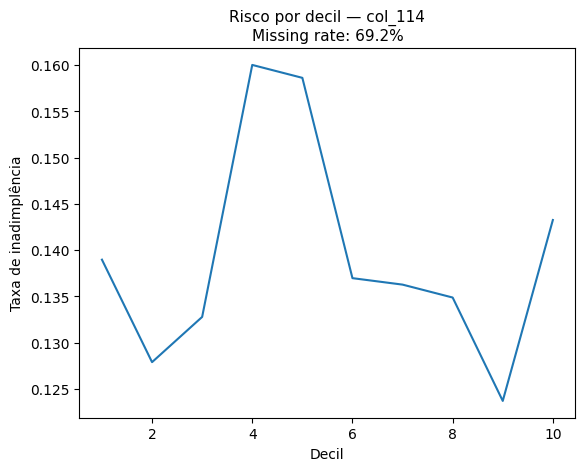

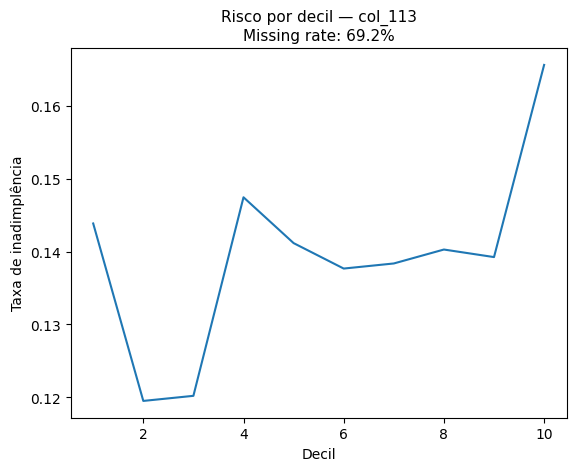

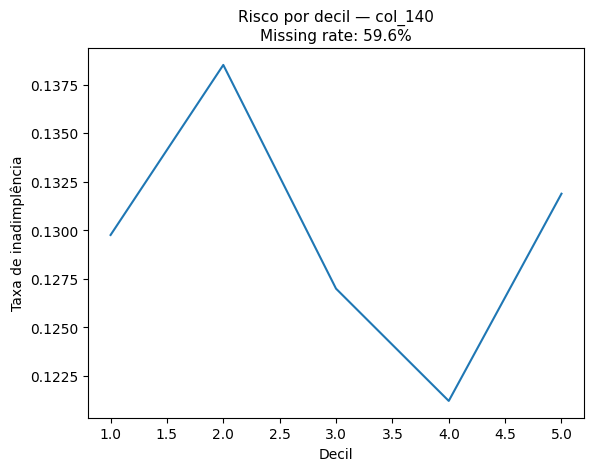

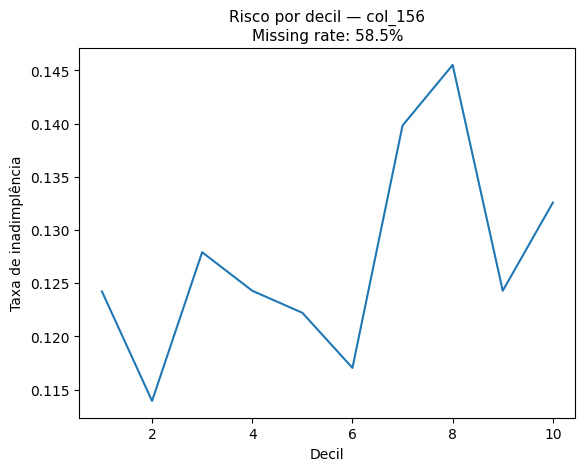

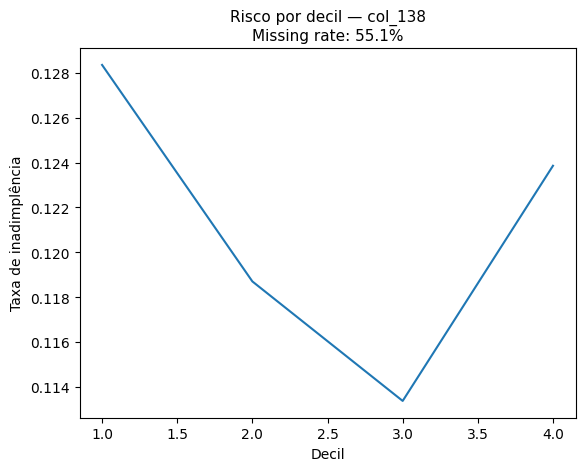

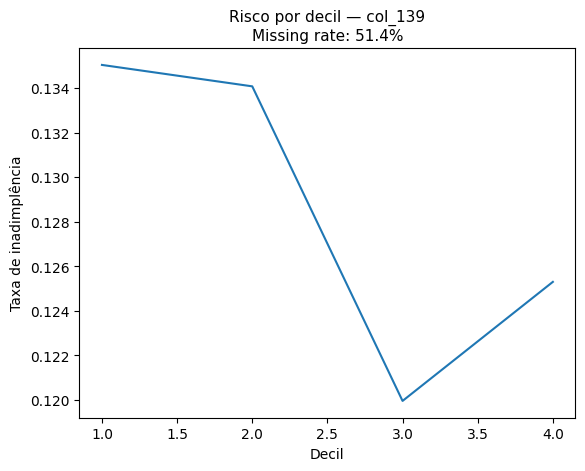

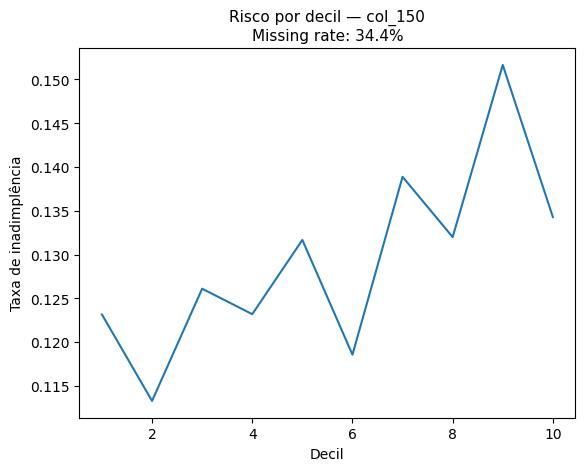

In [488]:
numeric_cols_30_70 = [
    "col_114",
    "col_113",
    "col_140",
    "col_156",
    "col_138",
    "col_139",
    "col_150"
]

for c in numeric_cols_30_70:
    plot_risk_by_decil(df_base, c, TARGET)


Para as variáveis numéricas analisadas, foram gerados gráficos de risco por decil, complementados com a taxa de valores ausentes de cada variável. Essa abordagem permite avaliar visualmente a presença de padrões monotônicos ou separação de risco, considerando simultaneamente a representatividade da informação na base.


### Teste de imputação

In [489]:
num_cols_30_70 = [
    "col_114",
    "col_113",
    "col_140",
    "col_156",
    "col_138",
    "col_139",
    "col_150",
]
df_imputed = df_base.copy()
for c in num_cols_30_70:
    median_value = df_imputed[c].median()
    df_imputed[c] = df_imputed[c].fillna(median_value)

import matplotlib.pyplot as plt
import pandas as pd

def plot_risk_by_decil_before_after(
    df_original,
    df_imputed,
    col,
    target,
    q=10
):
    # -------- BEFORE (sem imputação) --------
    df_before = df_original.loc[df_original[col].notna(), [col, target]].copy()
    
    df_before["decil"] = pd.qcut(
        df_before[col],
        q=q,
        duplicates="drop"
    )
    
    risk_before = (
        df_before
        .groupby("decil", observed=True)[target]
        .mean()
        .reset_index(drop=True)
    )
    
    # -------- AFTER (com imputação) --------
    df_after = df_imputed[[col, target]].copy()
    
    df_after["decil"] = pd.qcut(
        df_after[col],
        q=q,
        duplicates="drop"
    )
    
    risk_after = (
        df_after
        .groupby("decil", observed=True)[target]
        .mean()
        .reset_index(drop=True)
    )
    
    # -------- METADATA --------
    missing_rate = df_original[col].isna().mean() * 100
    
    # -------- PLOT --------
    fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
    
    # Before
    axes[0].plot(
        range(1, len(risk_before) + 1),
        risk_before.values
    )
    axes[0].set_title("Antes da imputação")
    axes[0].set_xlabel("Decil")
    axes[0].set_ylabel("Taxa de inadimplência")
    
    # After
    axes[1].plot(
        range(1, len(risk_after) + 1),
        risk_after.values
    )
    axes[1].set_title("Após imputação (mediana)")
    axes[1].set_xlabel("Decil")
    
    fig.suptitle(
        f"Risco por decil — {col} | Missing rate: {missing_rate:.1f}%",
        fontsize=12
    )
    
    plt.tight_layout()
    plt.show()



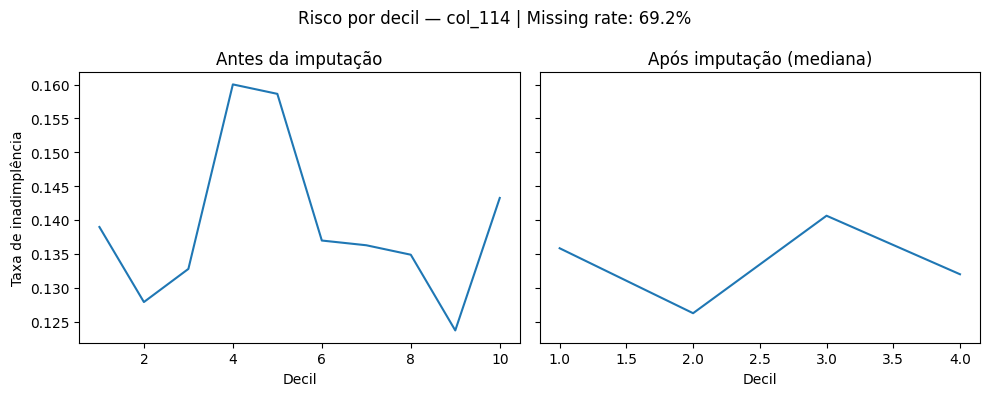

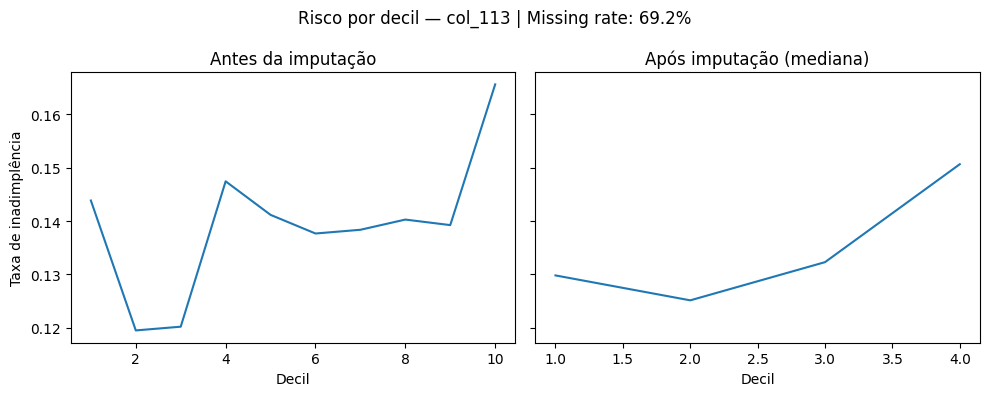

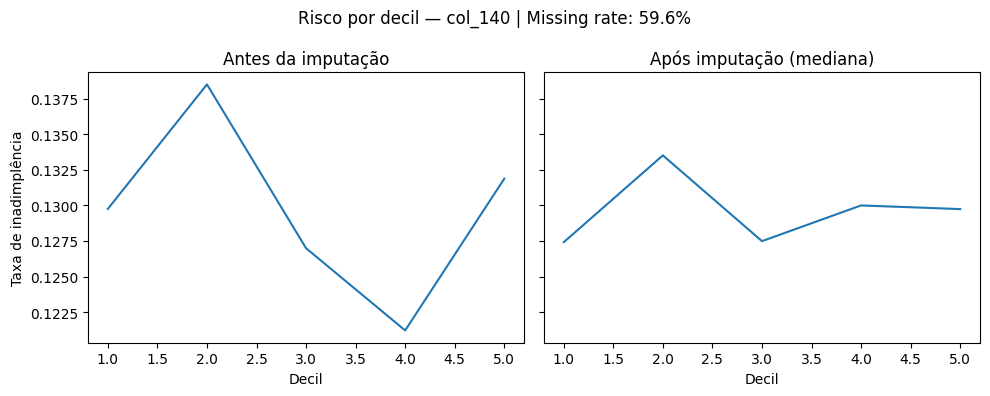

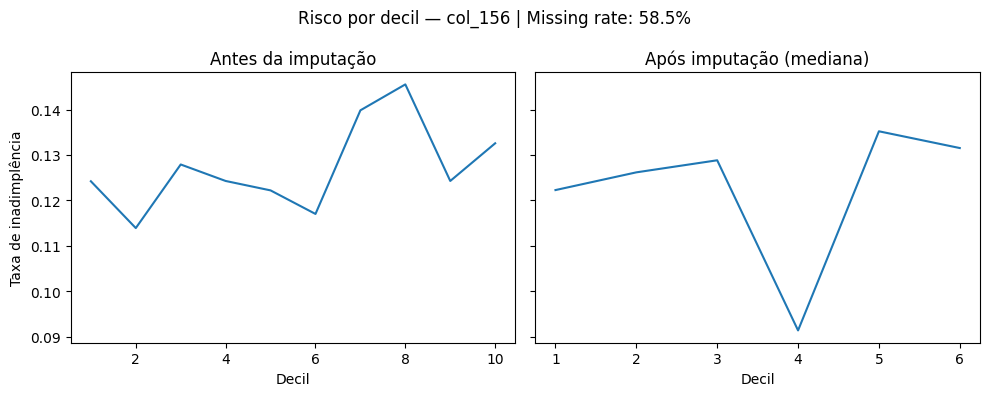

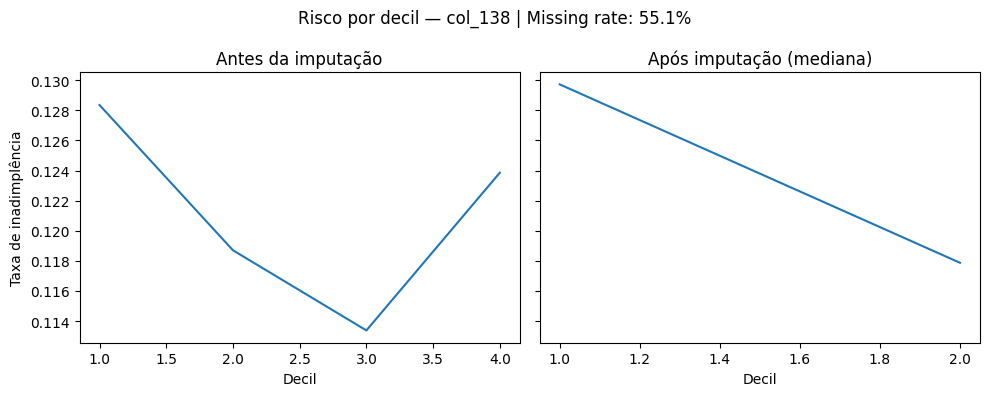

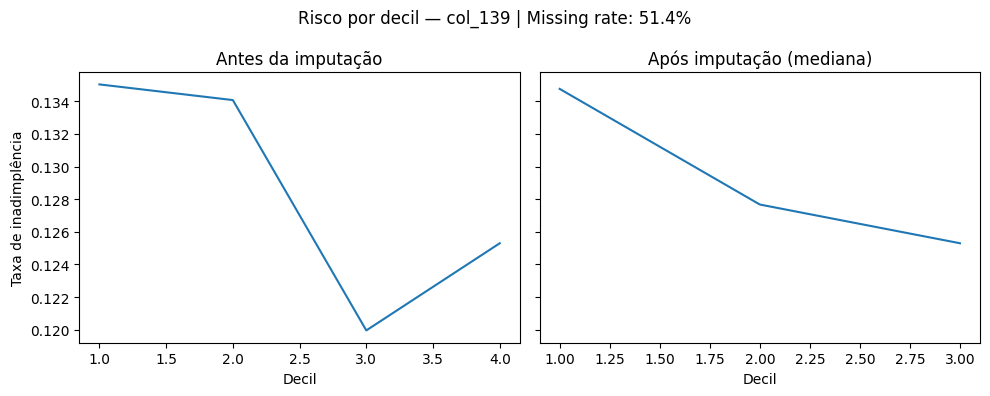

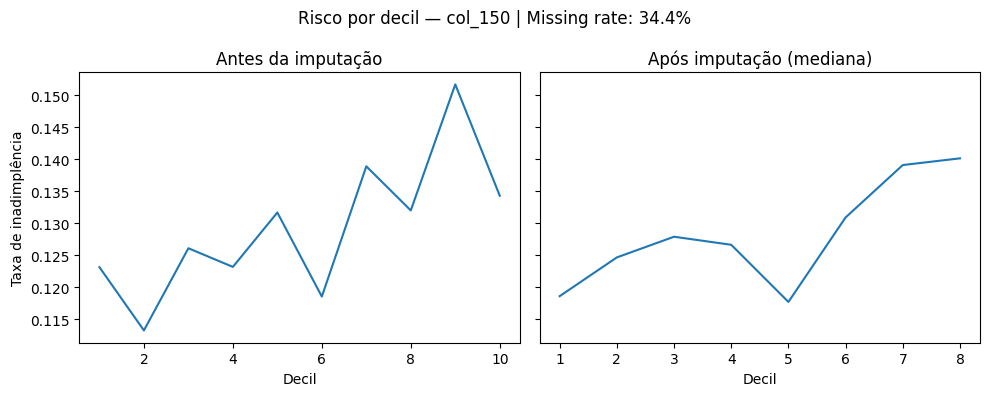

In [490]:
for c in num_cols_30_70:
    plot_risk_by_decil_before_after(
        df_original=df_base,
        df_imputed=df_imputed,
        col=c,
        target=TARGET
    )


### Análise de Relação entre Variáveis Numéricas e Inadimplência

Nesta etapa da análise exploratória, avaliou-se a relação entre os **valores observados das variáveis numéricas** e a **taxa de inadimplência**, utilizando gráficos de risco por decil. Para cada variável, os registros foram ordenados pelo valor da feature e segmentados em decis, calculando-se a proporção de maus pagadores em cada grupo. Essa abordagem permite identificar padrões monotônicos, não lineares ou ausência de sinal preditivo, sem pressupor qualquer relação funcional entre a variável e o alvo.

A análise foi conduzida **exclusivamente sobre valores não ausentes**, de forma deliberada. A imputação de valores ausentes, especialmente por medidas de tendência central, pode introduzir concentrações artificiais na distrib


In [491]:
df_clean = df_base.copy()
# Criar missing flags (todas que precisam)
cols_with_flag = [
    "col_114",
    "col_113",
    "col_156",
    "col_150",
    "col_138",
    "col_139",
]

for c in cols_with_flag:
    df_clean[f"{c}_missing_flag"] = df_clean[c].isna().astype(int)


In [492]:
# Imputar por mediana (somente onde decidido)

cols_impute_median = [
    "col_114",
    "col_113",
    "col_156",
    "col_150",
    "col_140",
]

for c in cols_impute_median:
    median_value = df_clean[c].median()
    df_clean[c] = df_clean[c].fillna(median_value)


In [493]:
# Remover valores contínuos e manter apenas a flag, que carrega o sinal
cols_drop_continuous = [
    "col_138",
    "col_139",
]

df_clean = df_clean.drop(columns=cols_drop_continuous)


In [494]:
summary = []

for c in cols_with_flag:
    summary.append({
        "variavel": c,
        "missing_original_%": df_base[c].isna().mean() * 100,
        "flag_criada": f"{c}_missing_flag" in df_clean.columns,
        "ainda_tem_nan": df_clean[c].isna().any() if c in df_clean.columns else False
    })

pd.DataFrame(summary)


,variavel,missing_original_%,flag_criada,ainda_tem_nan
0,col_114,69.238210,True,False
1,col_113,69.238210,True,False
2,col_156,58.490607,True,False
3,col_150,34.375134,True,False
4,col_138,55.115859,True,False
5,col_139,51.448777,True,False


A decisão de imputação foi baseada na análise comparativa dos gráficos de risco por decil antes e após a imputação por mediana. Variáveis cujo padrão de risco era consistente nos valores observados foram mantidas com imputação, acompanhadas de indicadores explícitos de ausência quando necessário. Em casos onde a imputação introduziu padrões artificiais ou suavização excessiva, optou-se por descartar o valor contínuo e preservar apenas o efeito informativo da ausência por meio de flags de missing.


### B) Variáveis categóricas no intervalo 30-70

In [495]:
TARGET = "alvo"

cat_cols_30_70 = (
    df_base
    .select_dtypes(include=["object", "category"])
    .columns
)

cat_cols_30_70 = [
    c for c in cat_cols_30_70
    if 0.30 <= df_base[c].isna().mean() <= 0.70
]


In [496]:
df_clean[cat_cols_30_70]

,col_120,col_154,col_158,col_171,col_172,col_186
index,,,,,,
0,NaN,VAREJO,VAREJO-BANCOS,FUNDAMENTAL COMPLETO,BASICO,NaN
1,INDEFINIDO,VAREJO,NaN,SUPERIOR INCOMPLETO,MEDIO,NaN
2,INDEFINIDO,BANCOS,NaN,SUPERIOR COMPLETO,ALTO,NaN
3,NaN,FINANCEIRAS,NaN,NaN,NaN,S
4,NaN,VAREJO,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
46517,NaN,NaN,NaN,NaN,NaN,S
46518,NaN,NaN,NaN,NaN,NaN,NaN
46519,NaN,VAREJO,VAREJO-FINANCEIRAS,MEDIO COMPLETO,MEDIO,NaN


In [497]:
rows = []

global_rate = df_base[TARGET].mean()

for c in cat_cols_30_70:
    series = df_base[c]
    
    missing_mask = series.isna()
    present_mask = ~missing_mask
    
    rows.append({
        "variavel": c,
        "missing_rate": missing_mask.mean(),
        "nunique_non_null": series.nunique(dropna=True),
        "support_non_null": present_mask.sum(),
        "event_rate_missing": df_base.loc[missing_mask, TARGET].mean(),
        "event_rate_present": df_base.loc[present_mask, TARGET].mean(),
        "delta_missing_pp": (
            df_base.loc[missing_mask, TARGET].mean() - global_rate
        ) * 100,
        "delta_present_pp": (
            df_base.loc[present_mask, TARGET].mean() - global_rate
        ) * 100,
    })

cat_missing_diagnosis = (
    pd.DataFrame(rows)
    .sort_values("missing_rate", ascending=False)
)

cat_missing_diagnosis


,variavel,missing_rate,nunique_non_null,support_non_null,event_rate_missing,event_rate_present,delta_missing_pp,delta_present_pp
0,col_120,0.692382,3,14311,0.123747,0.139333,-0.479479,1.079204
5,col_186,0.632604,1,17092,0.129392,0.127077,0.085044,-0.146434
2,col_158,0.584906,12,19311,0.129506,0.127181,0.096511,-0.135994
3,col_171,0.461459,12,25054,0.122135,0.134030,-0.640606,0.548916
4,col_172,0.461459,5,25054,0.122135,0.134030,-0.640606,0.548916
1,col_154,0.343751,4,30530,0.127126,0.129283,-0.141527,0.074134


As variáveis categóricas com taxa de ausência entre 30% e 70% foram avaliadas separando o efeito do valor observado e o efeito da ausência de informação. Variáveis com diferença relevante de risco entre registros presentes e ausentes foram mantidas com indicadores explícitos de missing. Variáveis sem sinal discriminatório tanto no valor quanto na ausência foram removidas. Em casos de cardinalidade elevada, categorias raras foram agrupadas para reduzir ruído e evitar overfitting.


In [498]:
# col_186:
# Variável categórica com apenas um valor possível quando presente ("S"),
# sem diferença relevante de taxa de inadimplência entre registros presentes
# e ausentes. Não carrega sinal discriminatório nem pelo valor nem pelo missing.
# Decisão: remoção completa da variável.
df_clean = df_clean.drop(columns=["col_186"])

In [499]:
df_clean["col_120"]

index
0               NaN
1        INDEFINIDO
2        INDEFINIDO
3               NaN
4               NaN
            ...    
46517           NaN
46518           NaN
46519           NaN
46520           NaN
46521           NaN
Name: col_120, Length: 46522, dtype: object

In [500]:
# col_120:
# Variável categórica com baixa cardinalidade e diferença relevante de risco
# entre registros presentes e ausentes. O missing carrega sinal próprio,
# portanto é tratado explicitamente via flag, sem imputação do valor.
df_clean["col_120_missing_flag"] = df_clean["col_120"].isna().astype(int)


# col_171:
# Variável categórica com sinal tanto no valor quanto na ausência.
# Categorias raras são agrupadas para reduzir ruído e risco de overfitting.

min_count = 300
value_counts_171 = df_clean["col_171"].value_counts(dropna=True)
rare_171 = value_counts_171[value_counts_171 < min_count].index

df_clean["col_171"] = df_clean["col_171"].replace(rare_171, "OUTROS")

df_clean["col_171_missing_flag"] = df_clean["col_171"].isna().astype(int)

# col_172:
# Variável categórica de baixa cardinalidade, com padrão de risco consistente
# e diferença relevante entre presença e ausência. Mantida sem imputação,
# com criação explícita de flag de missing.
df_clean["col_172_missing_flag"] = df_clean["col_172"].isna().astype(int)

# col_154:
# Variável categórica de baixa cardinalidade, com sinal fraco tanto no valor
# quanto na ausência. Mantida de forma conservadora, com criação de flag de
# missing para permitir avaliação posterior durante a modelagem.
df_clean["col_154_missing_flag"] = df_clean["col_154"].isna().astype(int)



In [501]:
# col_158:
# Variável categórica com valores compostos separados por "-".
# A transformação divide a informação em dois componentes semânticos
# distintos (ex.: setor principal e setor secundário), preservando
# o efeito informativo da ausência por meio de uma flag explícita.

# Criar flag de missing
df_clean["col_158_missing_flag"] = df_clean["col_158"].isna().astype(int)

# Split apenas onde há valor
split_158 = df_clean["col_158"].dropna().str.split("-", expand=True)

df_clean.loc[split_158.index, "col_158_part_1"] = split_158[0]
df_clean.loc[split_158.index, "col_158_part_2"] = split_158[1]

for c in ["col_158_part_1", "col_158_part_2"]:
    df_clean[c] = df_clean[c].fillna("SEM_INFO")


In [502]:
df_clean

,alvo,REF_DATE,DIAS_ATRASO,col_4,col_6,col_10,col_11,col_13,col_14,col_15,...,col_150_missing_flag,col_138_missing_flag,col_139_missing_flag,col_120_missing_flag,col_171_missing_flag,col_172_missing_flag,col_154_missing_flag,col_158_missing_flag,col_158_part_1,col_158_part_2
index,,,,,,,,,,,,,,,,,,,,,
0,0,2023-01-31,52,2461.11,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,VAREJO,BANCOS
1,0,2022-12-29,37,4674.50,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,SEM_INFO,SEM_INFO
2,0,2023-09-29,36,43649.17,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,SEM_INFO,SEM_INFO
3,1,2023-02-28,48,1090.58,0,0,0,0,0,0,...,0,1,0,1,1,1,0,1,SEM_INFO,SEM_INFO
4,0,2023-02-28,34,1495.49,0,0,0,0,0,0,...,0,1,1,1,1,1,0,1,SEM_INFO,SEM_INFO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46517,1,2023-07-31,45,1404.07,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,SEM_INFO,SEM_INFO
46518,0,2022-12-29,46,449.19,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,SEM_INFO,SEM_INFO
46519,1,2023-01-31,54,1965.92,2,0,0,0,0,2,...,0,0,0,1,0,0,0,0,VAREJO,FINANCEIRAS


Após a decomposição da variável col_158 em dois componentes categóricos, observou-se
baixa cardinalidade e distribuição equilibrada entre as categorias observadas.
Apesar da elevada taxa de ausência, os valores presentes carregam informação
semântica relevante relacionada ao setor de atuação.

## Missing baixo <30%

In [503]:
cols_missing_lt_30 = [
    c for c in df_clean.columns
    if 0 < df_clean[c].isna().mean() < 0.30
]


separar por tipos:

In [504]:
num_cols_lt_30 = df_base[cols_missing_lt_30].select_dtypes(
    include=["number"]
).columns.tolist()

cat_cols_lt_30 = df_base[cols_missing_lt_30].select_dtypes(
    include=["object", "category"]
).columns.tolist()


In [505]:
rows = []
global_rate = df_base[TARGET].mean()

for c in cols_missing_lt_30:
    rows.append({
        "variavel": c,
        "dtype": df_base[c].dtype,
        "missing_rate": df_base[c].isna().mean(),
        "event_rate_missing": df_base.loc[df_base[c].isna(), TARGET].mean(),
        "event_rate_present": df_base.loc[df_base[c].notna(), TARGET].mean(),
        "delta_missing_pp": (
            df_base.loc[df_base[c].isna(), TARGET].mean() - global_rate
        ) * 100
    })

missing_lt_30_summary = pd.DataFrame(rows).sort_values(
    "missing_rate", ascending=False
)

missing_lt_30_summary


,variavel,dtype,missing_rate,event_rate_missing,event_rate_present,delta_missing_pp
46,col_168,object,0.290078,0.123379,0.130651,-0.516231
44,col_141,float64,0.248850,0.122052,0.130691,-0.648899
40,col_115,float64,0.204613,0.123122,0.129935,-0.541916
42,col_118,object,0.138988,0.120786,0.129793,-0.775569
47,col_169,float64,0.131551,0.120588,0.129746,-0.795310
43,col_119,object,0.131486,0.120647,0.129736,-0.789396
57,col_200,object,0.104445,0.122247,0.129275,-0.629396
39,col_112,float64,0.103392,0.122869,0.129195,-0.567231
41,col_117,object,0.103392,0.122869,0.129195,-0.567231
38,col_111,float64,0.103392,0.122869,0.129195,-0.567231


Regra objetiva de decisão: Criar missing_flag apenas se |delta_missing_pp| ≥ 1.5 p.p.



## A) Numericas:

In [506]:
import pandas as pd

TARGET = "alvo"

# Numéricas com missing entre 0% e 30% (exclui target)
num_cols_lt_30 = [
    c for c in df_base.select_dtypes(include=["number"]).columns
    if c != TARGET and 0 < df_base[c].isna().mean() < 0.30
]

# Tabela de diagnóstico inicial
num_lt_30_table = (
    pd.DataFrame({
        "dtype": df_base[num_cols_lt_30].dtypes.astype(str),
        "missing_rate": [df_base[c].isna().mean() for c in num_cols_lt_30],
        "missing_count": [int(df_base[c].isna().sum()) for c in num_cols_lt_30],
        "non_missing_count": [int(df_base[c].notna().sum()) for c in num_cols_lt_30],
        "nunique_non_null": [int(df_base[c].nunique(dropna=True)) for c in num_cols_lt_30],
    }, index=num_cols_lt_30)
    .sort_values("missing_rate", ascending=False)
)

display(num_lt_30_table)
print(f"Total numéricas com 0%<missing<30%: {len(num_cols_lt_30)}")


,dtype,missing_rate,missing_count,non_missing_count,nunique_non_null
col_141,float64,0.248850,11577,34945,3315
col_115,float64,0.204613,9519,37003,705
col_169,float64,0.131551,6120,40402,9
col_111,float64,0.103392,4810,41712,37165
col_112,float64,0.103392,4810,41712,37004
col_51,float64,0.102167,4753,41769,74
col_53,float64,0.102167,4753,41769,132
col_52,float64,0.102167,4753,41769,94
col_58,float64,0.102167,4753,41769,109
col_57,float64,0.102167,4753,41769,73


Total numéricas com 0%<missing<30%: 40


In [507]:
cols_71_76 = [f"col_{i}" for i in range(71, 77)]

summary_71_76 = pd.DataFrame({
    "dtype": df_base[cols_71_76].dtypes.astype(str),
    "missing_rate": df_base[cols_71_76].isna().mean(),
    "missing_count": df_base[cols_71_76].isna().sum(),
    "non_missing_count": df_base[cols_71_76].notna().sum(),
    "nunique_non_null": df_base[cols_71_76].nunique(dropna=True),
    "std_non_null": df_base[cols_71_76].std()
})
summary_71_76


,dtype,missing_rate,missing_count,non_missing_count,nunique_non_null,std_non_null
col_71,float64,0.102167,4753,41769,1,0.0
col_72,float64,0.102167,4753,41769,1,0.0
col_73,float64,0.102167,4753,41769,1,0.0
col_74,float64,0.102167,4753,41769,1,0.0
col_75,float64,0.102167,4753,41769,1,0.0
col_76,float64,0.102167,4753,41769,1,0.0


In [508]:
cols_71_76 = [f"col_{i}" for i in range(71, 77)]

# Matriz booleana de missing
missing_matrix = df_base[cols_71_76].isna()

# Verificar se todas as colunas têm o mesmo padrão de missing
same_missing_pattern = (
    missing_matrix.eq(missing_matrix.iloc[:, 0], axis=0)
    .all(axis=1)
    .all()
)

print("As colunas possuem o mesmo padrão de missing:", same_missing_pattern)


As colunas possuem o mesmo padrão de missing: True


### Colunas com blocos faltantes

Agrupamento de col_71 a col_76 em uma única flag

In [509]:
# col_71 a col_76:
# Conjunto de variáveis numéricas com variância nula quando presentes e
# padrão de missing perfeitamente alinhado entre todas as colunas.
# O único sinal potencial é a presença ou ausência conjunta de informação.
# Decisão: consolidar em uma única flag de missing.

cols_71_76 = [f"col_{i}" for i in range(71, 77)]

df_clean["flag_col_71_76_missing"] = (
    df_clean[cols_71_76].isna().all(axis=1).astype(int)
)

df_clean = df_clean.drop(columns=cols_71_76)



In [510]:
def reconcile_columns(df, cols):
    """
    Separa colunas existentes e ausentes em um DataFrame.

    Returns
    -------
    existing_cols : list
        Colunas que existem no DataFrame.
    missing_cols : list
        Colunas que não existem mais no DataFrame.
    """
    existing_cols = [c for c in cols if c in df.columns]
    missing_cols = [c for c in cols if c not in df.columns]
    return existing_cols, missing_cols

num_cols_lt_30_existing, num_cols_lt_30_dropped = reconcile_columns(
    df_clean,
    num_cols_lt_30
)

print("Colunas <30% missing existentes:")
print(num_cols_lt_30_existing)

print("\nColunas <30% missing removidas:")
print(num_cols_lt_30_dropped)

df_clean[num_cols_lt_30_existing]

Colunas <30% missing existentes:
['col_51', 'col_52', 'col_53', 'col_54', 'col_55', 'col_56', 'col_57', 'col_58', 'col_59', 'col_60', 'col_61', 'col_62', 'col_63', 'col_64', 'col_65', 'col_66', 'col_67', 'col_68', 'col_69', 'col_70', 'col_77', 'col_78', 'col_109', 'col_110', 'col_111', 'col_112', 'col_115', 'col_141', 'col_167', 'col_169', 'col_174', 'col_197', 'col_198', 'col_199']

Colunas <30% missing removidas:
['col_71', 'col_72', 'col_73', 'col_74', 'col_75', 'col_76']


,col_51,col_52,col_53,col_54,col_55,col_56,col_57,col_58,col_59,col_60,...,col_111,col_112,col_115,col_141,col_167,col_169,col_174,col_197,col_198,col_199
index,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,2.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,...,44.652487,7.649935,18.5,0.000000,0.0,0.0,1.0,3.0,-1.0,1.0
1,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,41.610806,15.471505,6.5,0.666667,0.0,1.0,1.0,2.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,69.551781,0.823702,4.0,1.000000,0.0,1.0,4.0,4.0,3.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12.654966,12.654966,NaN,0.750000,0.0,0.0,0.0,4.0,-4.0,0.0
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,28.622711,9.043274,19.6,1.000000,0.0,0.0,3.0,4.0,-1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,3.0,-3.0,0.0
46518,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0
46519,2.0,2.0,3.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,...,48.267296,1.786110,6.6,0.000000,0.0,0.0,1.0,3.0,-1.0,0.0


Analise de padrões de dados ausentes e semelhanças entre colunas col 51 até col 79

In [511]:
cols_51_78 = [f"col_{i}" for i in range(51, 79)]
cols_51_78_existing = [c for c in cols_51_78 if c in df_clean.columns]


summary_51_78_clean = (
    pd.DataFrame({
        "dtype": df_clean[cols_51_78_existing].dtypes.astype(str),
        "missing_rate": df_clean[cols_51_78_existing].isna().mean(),
        "missing_count": df_clean[cols_51_78_existing].isna().sum(),
        "non_missing_count": df_clean[cols_51_78_existing].notna().sum(),
        "nunique_non_null": df_clean[cols_51_78_existing].nunique(dropna=True),
        "std_non_null": df_clean[cols_51_78_existing].std(),
    })
    .sort_values("missing_rate", ascending=False)
)

display(summary_51_78_clean)




,dtype,missing_rate,missing_count,non_missing_count,nunique_non_null,std_non_null
col_51,float64,0.102167,4753,41769,74,2.993708
col_52,float64,0.102167,4753,41769,94,4.971142
col_53,float64,0.102167,4753,41769,132,8.616684
col_54,float64,0.102167,4753,41769,181,13.935322
col_55,float64,0.102167,4753,41769,40,1.518208
col_56,float64,0.102167,4753,41769,49,2.144697
col_57,float64,0.102167,4753,41769,73,3.474656
col_58,float64,0.102167,4753,41769,109,6.578267
col_59,float64,0.102167,4753,41769,14,0.656938
col_60,float64,0.102167,4753,41769,21,1.281259


In [512]:
missing_matrix = df_clean[cols_51_78_existing].isna()

# Conta quantas colunas estão missing por linha
missing_row_counts = missing_matrix.sum(axis=1).value_counts().sort_index()

print(missing_row_counts)


0     41769
22     4753
Name: count, dtype: int64


In [513]:
TARGET = "alvo"
global_rate = df_clean[TARGET].mean()

missing_signal_51_78_clean = []

for c in cols_51_78_existing:
    missing_signal_51_78_clean.append({
        "variavel": c,
        "missing_rate": df_clean[c].isna().mean(),
        "support_missing": int(df_clean[c].isna().sum()),
        "event_rate_missing": df_clean.loc[df_clean[c].isna(), TARGET].mean(),
        "event_rate_present": df_clean.loc[df_clean[c].notna(), TARGET].mean(),
        "delta_missing_pp": (
            df_clean.loc[df_clean[c].isna(), TARGET].mean() - global_rate
        ) * 100,
    })

missing_signal_51_78_clean = (
    pd.DataFrame(missing_signal_51_78_clean)
    .sort_values("missing_rate", ascending=False)
)

display(missing_signal_51_78_clean)


,variavel,missing_rate,support_missing,event_rate_missing,event_rate_present,delta_missing_pp
0,col_51,0.102167,4753,0.119293,0.129594,-0.924826
1,col_52,0.102167,4753,0.119293,0.129594,-0.924826
2,col_53,0.102167,4753,0.119293,0.129594,-0.924826
3,col_54,0.102167,4753,0.119293,0.129594,-0.924826
4,col_55,0.102167,4753,0.119293,0.129594,-0.924826
5,col_56,0.102167,4753,0.119293,0.129594,-0.924826
6,col_57,0.102167,4753,0.119293,0.129594,-0.924826
7,col_58,0.102167,4753,0.119293,0.129594,-0.924826
8,col_59,0.102167,4753,0.119293,0.129594,-0.924826
9,col_60,0.102167,4753,0.119293,0.129594,-0.924826


In [514]:
# col_51 a col_70, col_77 e col_78:
# Bloco numérico com padrão de missing perfeitamente sincronizado (todas ausentes ou todas presentes).
# O fenômeno de ausência representa um único evento de "não cadastro" e apresenta sinal moderado de risco.
# Decisão: criar uma única flag de missing para o bloco e imputar valores por mediana para preservar sinal dos valores.

cols_block_51_70_77_78 = [f"col_{i}" for i in range(51, 71)] + ["col_77", "col_78"]
cols_block_51_70_77_78 = [c for c in cols_block_51_70_77_78 if c in df_clean.columns]

df_clean["flag_block_51_70_77_78_missing"] = (
    df_clean[cols_block_51_70_77_78].isna().all(axis=1).astype(int)
)

for c in cols_block_51_70_77_78:
    df_clean[c] = df_clean[c].fillna(df_clean[c].median())


As variáveis col_51–col_70, col_77 e col_78 apresentaram padrão de ausência perfeitamente sincronizado, indicando
um único fenômeno operacional de “registro cadastrado vs não cadastrado”. Semelhante ao outro bloco, tambem foi criada a flag de missing

### Analise de valores

In [515]:
num_cols_lt_30_existing, num_cols_lt_30_dropped = reconcile_columns(
    df_clean,
    num_cols_lt_30
)

print("Colunas <30% missing existentes:")
print(num_cols_lt_30_existing)

print("\nColunas <30% missing removidas:")
print(num_cols_lt_30_dropped)

df_clean[num_cols_lt_30_existing]

Colunas <30% missing existentes:
['col_51', 'col_52', 'col_53', 'col_54', 'col_55', 'col_56', 'col_57', 'col_58', 'col_59', 'col_60', 'col_61', 'col_62', 'col_63', 'col_64', 'col_65', 'col_66', 'col_67', 'col_68', 'col_69', 'col_70', 'col_77', 'col_78', 'col_109', 'col_110', 'col_111', 'col_112', 'col_115', 'col_141', 'col_167', 'col_169', 'col_174', 'col_197', 'col_198', 'col_199']

Colunas <30% missing removidas:
['col_71', 'col_72', 'col_73', 'col_74', 'col_75', 'col_76']


,col_51,col_52,col_53,col_54,col_55,col_56,col_57,col_58,col_59,col_60,...,col_111,col_112,col_115,col_141,col_167,col_169,col_174,col_197,col_198,col_199
index,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,2.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,...,44.652487,7.649935,18.5,0.000000,0.0,0.0,1.0,3.0,-1.0,1.0
1,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,41.610806,15.471505,6.5,0.666667,0.0,1.0,1.0,2.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,69.551781,0.823702,4.0,1.000000,0.0,1.0,4.0,4.0,3.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12.654966,12.654966,NaN,0.750000,0.0,0.0,0.0,4.0,-4.0,0.0
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,28.622711,9.043274,19.6,1.000000,0.0,0.0,3.0,4.0,-1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46517,0.0,1.0,2.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,3.0,-3.0,0.0
46518,0.0,1.0,2.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0
46519,2.0,2.0,3.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,...,48.267296,1.786110,6.6,0.000000,0.0,0.0,1.0,3.0,-1.0,0.0


In [516]:
num_audit = pd.DataFrame({
    "dtype": df_clean[num_cols_lt_30_existing].dtypes.astype(str),
    "missing_rate": df_clean[num_cols_lt_30_existing].isna().mean(),
    "missing_count": df_clean[num_cols_lt_30_existing].isna().sum(),
    "non_missing_count": df_clean[num_cols_lt_30_existing].notna().sum(),
    "nunique_non_null": df_clean[num_cols_lt_30_existing].nunique(dropna=True),
    "std_non_null": df_clean[num_cols_lt_30_existing].std(),
}).sort_values(
    ["nunique_non_null", "std_non_null"]
)

display(num_audit)


,dtype,missing_rate,missing_count,non_missing_count,nunique_non_null,std_non_null
col_167,float64,0.011672,543,45979,2,0.261333
col_199,float64,0.074889,3484,43038,2,0.463241
col_77,float64,0.000000,0,46522,3,0.021245
col_78,float64,0.000000,0,46522,6,0.067465
col_174,float64,0.011672,543,45979,6,1.240455
col_169,float64,0.131551,6120,40402,9,0.688629
col_197,float64,0.088754,4129,42393,12,1.122959
col_59,float64,0.000000,0,46522,14,0.624898
col_198,float64,0.089162,4148,42374,18,1.885828
col_60,float64,0.000000,0,46522,21,1.224005


In [517]:
quasi_constant = num_audit.query(
    "nunique_non_null <= 3 and nunique_non_null > 1"
).copy()

print(quasi_constant)


           dtype  missing_rate  missing_count  non_missing_count  \
col_167  float64      0.011672            543              45979   
col_199  float64      0.074889           3484              43038   
col_77   float64      0.000000              0              46522   

         nunique_non_null  std_non_null  
col_167                 2      0.261333  
col_199                 2      0.463241  
col_77                  3      0.021245  


In [518]:
def value_distribution(df, col):
    return (
        df[col]
        .value_counts(dropna=False)
        .to_frame("count")
        .assign(share=lambda x: x["count"] / x["count"].sum())
    )

for c in quasi_constant.index:
    print(f"\nDistribuição — {c}")
    display(value_distribution(df_clean, c))



Distribuição — col_167


,count,share
col_167,,
0.0,42589,0.915459
1.0,3390,0.072869
NaN,543,0.011672



Distribuição — col_199


,count,share
col_199,,
1.0,29618,0.636645
0.0,13420,0.288466
NaN,3484,0.074889



Distribuição — col_77


,count,share
col_77,,
0.0,46513,0.999807
1.0,5,0.000107
2.0,4,0.000086


In [519]:
def risk_by_value(df, col, target):
    return (
        df.groupby(col)[target]
        .agg(["count", "mean"])
        .rename(columns={"mean": "event_rate"})
    )

TARGET = "alvo"

for c in quasi_constant.index:
    print(f"\nRisco por valor — {c}")
    display(risk_by_value(df_clean, c, TARGET))



Risco por valor — col_167


,count,event_rate
col_167,,
0.0,42589,0.127286
1.0,3390,0.144248



Risco por valor — col_199


,count,event_rate
col_199,,
0.0,13420,0.141505
1.0,29618,0.123709



Risco por valor — col_77


,count,event_rate
col_77,,
0.0,46513,0.128545
1.0,5,0.200000
2.0,4,0.000000


eventos raros na coluna col_77 implicam em TARGET = 1?

In [520]:
df_clean.loc[df_clean["col_77"].isin([1, 2]), ["col_77", "alvo"]]
(
    df_clean.loc[df_clean["col_77"].isin([1, 2])]
    .groupby("col_77")["alvo"]
    .agg(["count", "sum", "mean"])
    .rename(columns={"mean": "event_rate"})
)
print(
    df_clean.loc[df_clean["col_77"].isin([1, 2]), "alvo"]
    .agg(["count", "sum", "mean"])
    .to_frame(name="all_non_zero")
)


       all_non_zero
count      9.000000
sum        1.000000
mean       0.111111


In [521]:
# col_199:
# Variável binária com missing moderado (~7%).
# Mantida como feature original e criada flag indicadora de ausência.

df_clean["col_199_missing_flag"] = df_clean["col_199"].isna().astype(int)
df_clean["col_199"] = df_clean["col_199"].fillna(df_clean["col_199"].median())
# col_77:
# Variável quase constante com valores não-zero extremamente raros (<0.02%).
# O valor absoluto não é estatisticamente confiável.
# Decisão: criar flag de ocorrência e remover a variável original.

df_clean["col_77_non_zero_flag"] = (df_clean["col_77"].fillna(0) > 0).astype(int)
df_clean = df_clean.drop(columns=["col_77"])



In [522]:
num_cols_lt_30_existing, num_cols_lt_30_dropped = reconcile_columns(
    df_clean,
    num_cols_lt_30
)

print("Colunas <30% missing existentes:")
print(num_cols_lt_30_existing)

print("\nColunas <30% missing removidas:")
print(num_cols_lt_30_dropped)

df_clean[num_cols_lt_30_existing]

Colunas <30% missing existentes:
['col_51', 'col_52', 'col_53', 'col_54', 'col_55', 'col_56', 'col_57', 'col_58', 'col_59', 'col_60', 'col_61', 'col_62', 'col_63', 'col_64', 'col_65', 'col_66', 'col_67', 'col_68', 'col_69', 'col_70', 'col_78', 'col_109', 'col_110', 'col_111', 'col_112', 'col_115', 'col_141', 'col_167', 'col_169', 'col_174', 'col_197', 'col_198', 'col_199']

Colunas <30% missing removidas:
['col_71', 'col_72', 'col_73', 'col_74', 'col_75', 'col_76', 'col_77']


,col_51,col_52,col_53,col_54,col_55,col_56,col_57,col_58,col_59,col_60,...,col_111,col_112,col_115,col_141,col_167,col_169,col_174,col_197,col_198,col_199
index,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,2.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,...,44.652487,7.649935,18.5,0.000000,0.0,0.0,1.0,3.0,-1.0,1.0
1,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,41.610806,15.471505,6.5,0.666667,0.0,1.0,1.0,2.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,69.551781,0.823702,4.0,1.000000,0.0,1.0,4.0,4.0,3.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12.654966,12.654966,NaN,0.750000,0.0,0.0,0.0,4.0,-4.0,0.0
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,28.622711,9.043274,19.6,1.000000,0.0,0.0,3.0,4.0,-1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46517,0.0,1.0,2.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,3.0,-3.0,0.0
46518,0.0,1.0,2.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0
46519,2.0,2.0,3.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,...,48.267296,1.786110,6.6,0.000000,0.0,0.0,1.0,3.0,-1.0,0.0


In [523]:
num_cols_tree = [
    'col_51','col_52','col_53','col_54','col_55','col_56','col_57','col_58',
    'col_59','col_60','col_61','col_62','col_63','col_64','col_65','col_66',
    'col_67','col_68','col_69','col_70','col_78',
    'col_109','col_110','col_111','col_112','col_115','col_141',
    'col_167','col_169','col_174','col_197','col_198','col_199'
]
for c in num_cols_tree:
    if df_clean[c].isna().any():
        df_clean[c] = df_clean[c].fillna(df_clean[c].median())

skew_check = (
    df_clean[num_cols_tree]
    .quantile([0.95, 0.99])
    .T
    .assign(ratio=lambda x: x[0.99] / x[0.95])
)

display(skew_check.sort_values("ratio", ascending=False))

for c in num_cols_tree:
    p95 = df_clean[c].quantile(0.95)
    p99 = df_clean[c].quantile(0.99)
    if p99 / max(p95, 1e-6) > 5:
        df_clean[c] = df_clean[c].clip(upper=p99)




,0.95,0.99,ratio
col_67,1.000000,5.000000,5.000000
col_55,1.000000,4.000000,4.000000
col_65,7.000000,23.000000,3.285714
col_58,9.000000,28.000000,3.111111
col_66,12.000000,37.000000,3.083333
col_64,4.000000,12.000000,3.000000
col_63,2.000000,6.000000,3.000000
col_59,1.000000,3.000000,3.000000
col_68,3.000000,8.000000,2.666667
col_51,4.000000,10.000000,2.500000


## B) Categóricas:

In [524]:
cat_cols_lt_30_existing = [
    c for c in df_clean.columns
    if df_clean[c].dtype == "object"
    and df_clean[c].isna().mean() < 0.30
]

print(cat_cols_lt_30_existing)


['col_79', 'col_80', 'col_81', 'col_82', 'col_83', 'col_84', 'col_85', 'col_86', 'col_117', 'col_118', 'col_119', 'col_143', 'col_144', 'col_145', 'col_146', 'col_147', 'col_148', 'col_149', 'col_152', 'col_153', 'col_155', 'col_157', 'col_159', 'col_161', 'col_162', 'col_163', 'col_168', 'col_178', 'col_184', 'col_185', 'col_194', 'col_195', 'col_196', 'col_200', 'REGIAO', 'col_158_part_1', 'col_158_part_2']


In [525]:
df_clean[cat_cols_lt_30_existing]

,col_79,col_80,col_81,col_82,col_83,col_84,col_85,col_86,col_117,col_118,...,col_178,col_184,col_185,col_194,col_195,col_196,col_200,REGIAO,col_158_part_1,col_158_part_2
index,,,,,,,,,,,,,,,,,,,,,
0,A,A,C,C,A,A,A,A,INDEFINIDO,INDEFINIDO,...,E,DE 25 A 39 ANOS,Y,NaN,MEDIO,NaN,URBANO,NORTE,VAREJO,BANCOS
1,A,A,A,C,A,A,A,C,INDEFINIDO,INDEFINIDO,...,D,DE 25 A 39 ANOS,Y,D,MEDIO,D,URBANO,NORDESTE,SEM_INFO,SEM_INFO
2,B,B,B,B,A,A,A,A,INDEFINIDO,INDEFINIDO,...,D,DE 40 A 59 ANOS,X,B,MUITO ALTO,B+,URBANO,SUDESTE,SEM_INFO,SEM_INFO
3,A,A,A,B,A,A,B,B,INDEFINIDO,INDEFINIDO,...,E,DE 40 A 59 ANOS,X,C,BAIXO,C-,URBANO,SUDESTE,SEM_INFO,SEM_INFO
4,A,A,B,B,A,A,A,A,INDEFINIDO,INDEFINIDO,...,E,DE 25 A 39 ANOS,Y,C,MEDIO,C,URBANO,SUDESTE,SEM_INFO,SEM_INFO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,E,DE 40 A 59 ANOS,Y,E,BAIXO,E-,URBANO MODERADO,NORDESTE,SEM_INFO,SEM_INFO
46518,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,E,DE 25 A 39 ANOS,Y,D,BAIXO,D,URBANO MODERADO,NORTE,SEM_INFO,SEM_INFO
46519,C,C,D,E,A,A,A,A,INDEFINIDO,INDEFINIDO,...,E,DE 25 A 39 ANOS,Y,D,MEDIO,D,URBANO,NORTE,VAREJO,FINANCEIRAS


In [526]:
cat_audit = pd.DataFrame({
    "missing_rate": df_clean[cat_cols_lt_30_existing].isna().mean(),
    "missing_count": df_clean[cat_cols_lt_30_existing].isna().sum(),
    "nunique_non_null": df_clean[cat_cols_lt_30_existing].nunique(dropna=True),
    "support_non_null": df_clean[cat_cols_lt_30_existing].notna().sum(),
}).sort_values("nunique_non_null")

display(cat_audit)


,missing_rate,missing_count,nunique_non_null,support_non_null
col_161,0.000000,0,2,46522
col_159,0.000000,0,2,46522
col_157,0.000000,0,2,46522
col_155,0.000000,0,2,46522
col_153,0.000000,0,2,46522
col_152,0.000000,0,2,46522
col_149,0.000000,0,2,46522
col_148,0.000000,0,2,46522
col_118,0.138988,6466,3,40056
col_119,0.131486,6117,3,40405


As variáveis categóricas foram organizadas em subgrupos conforme seu comportamento estatístico e
papel informacional no dataset.  
O subgrupo **D1** reúne variáveis de cardinalidade média (≈5 categorias) com taxa de missing não
desprezível, nas quais a ausência pode carregar sinal relevante (ex.: REGIAO, col_178, col_194).  
O subgrupo **D2** contempla variáveis com cardinalidade moderada e missing elevado próximo ao limite
de 30%, exigindo tratamento explícito da ausência como fonte potencial de informação (ex.: col_168).  
O subgrupo **D3** corresponde a blocos de variáveis com padrão de missing perfeitamente sincronizado,
representando um único fenômeno de cadastro e justificando a criação de uma flag única de ausência
(ex.: col_79–col_86).  
O subgrupo **D4** inclui variáveis categóricas com cardinalidade intermediária e baixo nível de
missing, cujo tratamento pode ser mais simples, mantendo as categorias originais sem criação de
flags adicionais (ex.: col_196).


### D1:

In [527]:
df_clean["REGIAO_missing_flag"] = df_clean["REGIAO"].isna().astype(int)
df_clean["REGIAO"] = df_clean["REGIAO"].fillna("MISSING")

df_clean["col_178_missing_flag"] = df_clean["col_178"].isna().astype(int)
df_clean["col_178"] = df_clean["col_178"].fillna("MISSING")

df_clean["col_194_missing_flag"] = df_clean["col_194"].isna().astype(int)
df_clean["col_194"] = df_clean["col_194"].fillna("MISSING")


As variáveis REGIAO, col_178 e col_194 apresentam cardinalidade baixa e semântica
clara de negócio. Observou-se presença de valores ausentes não desprezível, os quais
podem carregar sinal informacional relevante. Dessa forma, foram criados indicadores
binários de ausência e os valores faltantes foram tratados como uma categoria explícita
("MISSING"), permitindo que modelos baseados em árvores capturem adequadamente tanto
o efeito do valor quanto da ausência da informação.


### D2:

In [528]:
TARGET = "alvo"
global_rate = df_clean[TARGET].mean()

pd.DataFrame({
    "event_rate_missing": [df_clean.loc[df_clean["col_168"].isna(), TARGET].mean()],
    "event_rate_present": [df_clean.loc[df_clean["col_168"].notna(), TARGET].mean()],
    "delta_pp": [
        (df_clean.loc[df_clean["col_168"].isna(), TARGET].mean() - global_rate) * 100
    ]
})


,event_rate_missing,event_rate_present,delta_pp
0,0.123379,0.130651,-0.516231


In [529]:
print(
    df_clean["col_168"]
    .value_counts(dropna=False)
    .to_frame("count")
    .assign(share=lambda x: x["count"] / x["count"].sum())
)


                count     share
col_168                        
2 A 4 SM        14101  0.303104
NaN             13495  0.290078
SEM INFORMACAO   9021  0.193908
4 A 10 SM        5618  0.120760
ATE 2 SM         2898  0.062293
10 A 20 SM        719  0.015455
ACIMA DE 20 SM    428  0.009200
1/2 A 1 SM         86  0.001849
DE 1 A 1,5 SM      72  0.001548
DE 1,5 A 2 SM      54  0.001161
ATE 1/2 SM         30  0.000645


In [530]:
# col_168:
# Variável categórica socioeconômica (faixas de renda).
# Apresenta alta taxa de missing (~29%) com leve diferença de risco,
# o que indica potencial sinal informativo.
# Estratégia: criar flag de missing, tratar ausência como categoria
# explícita e agrupar categorias raras para reduzir overfitting.

df_clean["col_168_missing_flag"] = df_clean["col_168"].isna().astype(int)

df_clean["col_168"] = df_clean["col_168"].fillna("MISSING")

freq = df_clean["col_168"].value_counts(normalize=True)
rare = freq[freq < 0.01].index

df_clean["col_168"] = df_clean["col_168"].replace(rare, "OUTROS")


A variável col_168 representa faixas de renda e apresentou elevada proporção de
valores ausentes. Observou-se diferença consistente, ainda que moderada, entre a
taxa de inadimplência dos registros com e sem informação, indicando que a ausência
carrega sinal informativo. Assim, foi criada uma variável indicadora de missing, os
valores ausentes foram tratados como categoria explícita e categorias raras foram
agrupadas, preservando o sinal e reduzindo o risco de overfitting.


### D3:

In [531]:
cols_d3 = ["col_79", "col_80", "col_81", "col_82", "col_83", "col_84", "col_85", "col_86"]
df_clean[cols_d3]

,col_79,col_80,col_81,col_82,col_83,col_84,col_85,col_86
index,,,,,,,,
0,A,A,C,C,A,A,A,A
1,A,A,A,C,A,A,A,C
2,B,B,B,B,A,A,A,A
3,A,A,A,B,A,A,B,B
4,A,A,B,B,A,A,A,A
...,...,...,...,...,...,...,...,...
46517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46518,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46519,C,C,D,E,A,A,A,A


In [532]:
cols_d3 = ["col_79","col_80","col_81","col_82","col_83","col_84","col_85","col_86"]

df_clean["flag_d3_missing"] = df_clean[cols_d3].isna().all(axis=1).astype(int)

As variáveis col_79–col_86 formam um bloco possivelmente categórico com padrão de missing perfeitamente
sincronizado, indicando um único fenômeno de ausência de informação. Foi criada uma flag
única de missing para o grupo, preservando as variáveis originais para exploração do sinal
categórico individual, evitando redundância e perda de informação.


### D4 (Variáveis categóricas compostas / semiestruturadas)

In [533]:
import re

def is_d4_column(series, sample_size=100):
    sample = (
        series
        .dropna()
        .astype(str)
        .head(sample_size)
    )
    
    pattern = re.compile(r"\s-\s|:")  # separadores típicos D4
    
    return sample.str.contains(pattern).any()


# Candidatas: categóricas com <30% missing (como você definiu)
cat_lt_30 = [
    c for c in df_clean.columns
    if df_clean[c].dtype == "object"
]

d4_cols = [
    c for c in cat_lt_30
    if is_d4_column(df_clean[c])
]

df_base[d4_cols]


,col_162,col_163
index,,
0,APROV:S - NOVASOLIC:S - SOLICMESMOLOCAL:N,APROV:N - NOVASOLIC:N - SOLICMESMOLOCAL:N
1,APROV:S - NOVASOLIC:N - SOLICMESMOLOCAL:N,APROV:S - NOVASOLIC:N - SOLICMESMOLOCAL:N
2,APROV:S - NOVASOLIC:N - SOLICMESMOLOCAL:N,APROV:S - NOVASOLIC:N - SOLICMESMOLOCAL:N
3,APROV:S - NOVASOLIC:N - SOLICMESMOLOCAL:N,APROV:N - NOVASOLIC:N - SOLICMESMOLOCAL:N
4,APROV:S - NOVASOLIC:N - SOLICMESMOLOCAL:N,APROV:N - NOVASOLIC:N - SOLICMESMOLOCAL:N
...,...,...
46517,APROV:N - NOVASOLIC:N - SOLICMESMOLOCAL:N,APROV:N - NOVASOLIC:N - SOLICMESMOLOCAL:N
46518,APROV:N - NOVASOLIC:N - SOLICMESMOLOCAL:N,APROV:N - NOVASOLIC:N - SOLICMESMOLOCAL:N
46519,APROV:S - NOVASOLIC:S - SOLICMESMOLOCAL:N,APROV:N - NOVASOLIC:N - SOLICMESMOLOCAL:N


In [534]:
def parse_status_column(df, col, prefix):
    parsed = (
        df[col]
        .dropna()
        .str.split(" - ", expand=True)
        .apply(lambda x: x.str.split(":", expand=True)[1])
    )

    parsed.columns = [
        f"{prefix}_aprov",
        f"{prefix}_novasolic",
        f"{prefix}_solicmesmolocal"
    ]

    parsed = parsed.replace({"S": 1, "N": 0})

    df = df.join(parsed)
    df.drop(columns=[col], inplace=True)

    return df


df_clean = parse_status_column(df_clean, "col_162", "col_162")
df_clean = parse_status_column(df_clean, "col_163", "col_163")



C:\Users\ggrinspun\AppData\Local\Temp\ipykernel_13356\1177868606.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  parsed = parsed.replace({"S": 1, "N": 0})
C:\Users\ggrinspun\AppData\Local\Temp\ipykernel_13356\1177868606.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  parsed = parsed.replace({"S": 1, "N": 0})


In [535]:
for c in ["col_162_aprov", "col_162_novasolic", "col_162_solicmesmolocal"]:
    print(f"\nRisco por valor — {c}")
    display(risk_by_value(df_clean, c, TARGET))



Risco por valor — col_162_aprov


,count,event_rate
col_162_aprov,,
0,15992,0.127126
1,30530,0.129283



Risco por valor — col_162_novasolic


,count,event_rate
col_162_novasolic,,
0,31674,0.127834
1,14848,0.130051



Risco por valor — col_162_solicmesmolocal


,count,event_rate
col_162_solicmesmolocal,,
0,40055,0.127699
1,6467,0.133756


# Etapa 3 — Revisão da EDA
- checar se nada foi esquecido

In [536]:
df_clean

,alvo,REF_DATE,DIAS_ATRASO,col_4,col_6,col_10,col_11,col_13,col_14,col_15,...,col_178_missing_flag,col_194_missing_flag,col_168_missing_flag,flag_d3_missing,col_162_aprov,col_162_novasolic,col_162_solicmesmolocal,col_163_aprov,col_163_novasolic,col_163_solicmesmolocal
index,,,,,,,,,,,,,,,,,,,,,
0,0,2023-01-31,52,2461.11,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
1,0,2022-12-29,37,4674.50,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,0,2023-09-29,36,43649.17,1,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
3,1,2023-02-28,48,1090.58,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
4,0,2023-02-28,34,1495.49,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46517,1,2023-07-31,45,1404.07,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
46518,0,2022-12-29,46,449.19,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
46519,1,2023-01-31,54,1965.92,2,0,0,0,0,2,...,0,0,0,0,1,1,0,0,0,0


In [537]:
df_clean.isna().mean().max()


np.float64(0.6923820987919694)

revisar o tratamento das seguintes colunas:
- col_184
- col_158
- col_171 e col_172
- FAIXA_ATRASO


In [538]:
cols_review = [
    "col_184",
    "col_158",          # se ainda existir
    "col_171",
    "col_172",
    "FAIXA_ATRASO"
]

existing_cols = [c for c in cols_review if c in df_clean.columns]

df_clean[existing_cols].head(20)

,col_184,col_158,col_171,col_172,FAIXA_ATRASO
index,,,,,
0,DE 25 A 39 ANOS,VAREJO-BANCOS,FUNDAMENTAL COMPLETO,BASICO,51–60
1,DE 25 A 39 ANOS,NaN,SUPERIOR INCOMPLETO,MEDIO,31–40
2,DE 40 A 59 ANOS,NaN,SUPERIOR COMPLETO,ALTO,31–40
3,DE 40 A 59 ANOS,NaN,NaN,NaN,41–50
4,DE 25 A 39 ANOS,NaN,NaN,NaN,31–40
5,DE 25 A 39 ANOS,BANCOS-BANCOS,NaN,NaN,41–50
6,DE 40 A 59 ANOS,BANCOS-FINANCEIRAS,NaN,NaN,41–50
7,DE 25 A 39 ANOS,VAREJO-VAREJO,SUPERIOR COMPLETO,ALTO,41–50
8,DE 25 A 39 ANOS,NaN,NaN,NaN,51–60


In [539]:
# col_158:
# Variável categórica composta já decomposta em col_158_part_1 e col_158_part_2.
# A coluna original é redundante e foi removida para evitar duplicação de sinal.
df_clean.drop(columns=["col_158"], inplace=True)

In [540]:
print(df_clean["col_184"])

index
0        DE 25 A 39 ANOS
1        DE 25 A 39 ANOS
2        DE 40 A 59 ANOS
3        DE 40 A 59 ANOS
4        DE 25 A 39 ANOS
              ...       
46517    DE 40 A 59 ANOS
46518    DE 25 A 39 ANOS
46519    DE 25 A 39 ANOS
46520    DE 25 A 39 ANOS
46521    DE 40 A 59 ANOS
Name: col_184, Length: 46522, dtype: object


In [541]:
print(risk_by_value(df_clean, "col_184", TARGET))

                 count  event_rate
col_184                           
60 ANOS OU MAIS   1407    0.157783
ATE 24 ANOS       6687    0.114850
DE 25 A 39 ANOS  23167    0.124401
DE 40 A 59 ANOS  15163    0.138297


A variável col_184 representa faixas etárias e apresenta relação monotônica
com a taxa de inadimplência, observando-se aumento consistente do risco à
medida que a faixa etária avança. Dessa forma, a variável foi tratada como
categórica ordinal e convertida para uma representação numérica ordenada,
preservando sua semântica e permitindo splits interpretáveis no modelo de árvore.


In [542]:
age_order = {
    "ATE 24 ANOS": 1,
    "DE 25 A 39 ANOS": 2,
    "DE 40 A 59 ANOS": 3,
    "60 ANOS OU MAIS": 4
}

df_clean["col_184_ord"] = df_clean["col_184"].map(age_order)
df_clean.drop(columns=["col_184"], inplace=True)


In [543]:
print(df_clean[["col_171", "col_172"]])

                    col_171 col_172
index                              
0      FUNDAMENTAL COMPLETO  BASICO
1       SUPERIOR INCOMPLETO   MEDIO
2         SUPERIOR COMPLETO    ALTO
3                       NaN     NaN
4                       NaN     NaN
...                     ...     ...
46517                   NaN     NaN
46518                   NaN     NaN
46519        MEDIO COMPLETO   MEDIO
46520        MEDIO COMPLETO   MEDIO
46521                   NaN     NaN

[46522 rows x 2 columns]


In [544]:
print((
    df_clean
    .dropna(subset=["col_171", "col_172"])
    .groupby("col_172")["col_171"]
    .unique()
    .to_frame("valores_col_171")
)
)

                                          valores_col_171
col_172                                                  
ALTO                                  [SUPERIOR COMPLETO]
BAIXO                    [FUNDAMENTAL INCOMPLETO, OUTROS]
BASICO           [FUNDAMENTAL COMPLETO, MEDIO INCOMPLETO]
MEDIO       [SUPERIOR INCOMPLETO, MEDIO COMPLETO, OUTROS]
MUITO ALTO                                       [OUTROS]


In [545]:
pd.crosstab(df_clean["col_171"], df_clean["col_172"])

col_172,ALTO,BAIXO,BASICO,MEDIO,MUITO ALTO
col_171,,,,,
FUNDAMENTAL COMPLETO,0,0,2627,0,0
FUNDAMENTAL INCOMPLETO,0,634,0,0,0
MEDIO COMPLETO,0,0,0,8763,0
MEDIO INCOMPLETO,0,0,1442,0,0
OUTROS,0,430,0,1,9
SUPERIOR COMPLETO,10108,0,0,0,0
SUPERIOR INCOMPLETO,0,0,0,1040,0


In [546]:
educ_ord = {
    "BAIXO": 1,
    "BASICO": 2,
    "MEDIO": 3,
    "ALTO": 4,
    "MUITO ALTO": 5
}

df_clean["col_172_ord"] = df_clean["col_172"].map(educ_ord)
df_clean["col_172_missing_flag"] = df_clean["col_172"].isna().astype(int)


In [547]:
df_clean["col_171_missing_flag"] = df_clean["col_171"].isna().astype(int)
df_clean["col_171"] = df_clean["col_171"].fillna("SEM_INFO")


As variáveis col_171 e col_172 apresentam forte relação hierárquica, porém não
configuram uma agregação determinística perfeita. Enquanto a col_171 descreve
níveis educacionais de forma granular, a col_172 representa um grau agregado de
escolaridade, incorporando informação adicional para alguns registros classificados
como OUTROS. Dessa forma, ambas foram mantidas no modelo, com col_172 tratada
como variável ordinal e col_171 como categórica nominal, evitando perda de
informação e preservando complementaridade semântica.


In [548]:
df_clean["FAIXA_ATRASO"]

index
0        51–60
1        31–40
2        31–40
3        41–50
4        31–40
         ...  
46517    41–50
46518    41–50
46519    51–60
46520    31–40
46521    31–40
Name: FAIXA_ATRASO, Length: 46522, dtype: category
Categories (3, object): ['31–40' < '41–50' < '51–60']

In [549]:
(
    df_clean
    .assign(decile_dias_atraso=pd.qcut(df_clean["DIAS_ATRASO"], q=10))
    .groupby("decile_dias_atraso")["alvo"]
    .agg(count="count", event_rate="mean")
)


C:\Users\ggrinspun\AppData\Local\Temp\ipykernel_13356\4091385916.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("decile_dias_atraso")["alvo"]


,count,event_rate
decile_dias_atraso,,
"(30.999, 34.0]",6365,0.161351
"(34.0, 36.0]",3244,0.153514
"(36.0, 39.0]",4553,0.139688
"(39.0, 42.0]",4589,0.134016
"(42.0, 46.0]",6241,0.128345
"(46.0, 48.0]",3207,0.114749
"(48.0, 51.0]",5865,0.112361
"(51.0, 53.0]",3162,0.108476
"(53.0, 57.0]",5589,0.104849


A variável FAIXA_ATRASO consiste em uma discretização determinística da variável
contínua DIAS_ATRASO, não adicionando informação nova ao modelo quando ambas são
utilizadas simultaneamente. Do ponto de vista matemático, a entropia condicional
de FAIXA_ATRASO dado DIAS_ATRASO é nula, caracterizando redundância informacional.
Além disso, a discretização implica perda de informação, uma vez que múltiplos
valores distintos de DIAS_ATRASO são mapeados para uma mesma categoria. Considerando
que modelos baseados em árvore aprendem automaticamente pontos de corte ótimos a
partir de variáveis contínuas, optou-se por manter apenas DIAS_ATRASO e remover
FAIXA_ATRASO, evitando redundância e permitindo maior flexibilidade e eficiência
nos splits do modelo.


In [550]:
df_clean.drop(columns=["FAIXA_ATRASO"], inplace=True)

# Etapa 4: Modelagem

In [551]:
df_clean.head()

,alvo,REF_DATE,DIAS_ATRASO,col_4,col_6,col_10,col_11,col_13,col_14,col_15,...,col_168_missing_flag,flag_d3_missing,col_162_aprov,col_162_novasolic,col_162_solicmesmolocal,col_163_aprov,col_163_novasolic,col_163_solicmesmolocal,col_184_ord,col_172_ord
index,,,,,,,,,,,,,,,,,,,,,
0,0,2023-01-31,52,2461.11,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,2.0,2.0
1,0,2022-12-29,37,4674.50,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,2.0,3.0
2,0,2023-09-29,36,43649.17,1,0,0,0,0,1,...,0,0,1,0,0,1,0,0,3.0,4.0
3,1,2023-02-28,48,1090.58,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,3.0,NaN
4,0,2023-02-28,34,1495.49,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,2.0,NaN


In [552]:
TARGET = "alvo"
DATE_COL = "REF_DATE"

# index já está no índice do DataFrame
cols_excluir = [TARGET, DATE_COL]

# =========================
# Features categóricas
# =========================
cat_features = (
    df_clean
    .drop(columns=cols_excluir)
    .select_dtypes(include=["object", "category"])
    .columns
    .tolist()
)

# =========================
# Features numéricas
# =========================
num_features = (
    df_clean
    .drop(columns=cols_excluir)
    .select_dtypes(include=["int64", "float64", "int32", "float32"])
    .columns
    .tolist()
)

print(f"Nº features numéricas: {len(num_features)}")
print(f"Nº features categóricas: {len(cat_features)}")
print(f"Total de features: {len(num_features) + len(cat_features)}")

# Validação
assert set(num_features).isdisjoint(set(cat_features))


Nº features numéricas: 142
Nº features categóricas: 38
Total de features: 180


In [553]:
df_clean[cat_features]

,col_79,col_80,col_81,col_82,col_83,col_84,col_85,col_86,col_117,col_118,...,col_172,col_178,col_185,col_194,col_195,col_196,col_200,REGIAO,col_158_part_1,col_158_part_2
index,,,,,,,,,,,,,,,,,,,,,
0,A,A,C,C,A,A,A,A,INDEFINIDO,INDEFINIDO,...,BASICO,E,Y,MISSING,MEDIO,NaN,URBANO,NORTE,VAREJO,BANCOS
1,A,A,A,C,A,A,A,C,INDEFINIDO,INDEFINIDO,...,MEDIO,D,Y,D,MEDIO,D,URBANO,NORDESTE,SEM_INFO,SEM_INFO
2,B,B,B,B,A,A,A,A,INDEFINIDO,INDEFINIDO,...,ALTO,D,X,B,MUITO ALTO,B+,URBANO,SUDESTE,SEM_INFO,SEM_INFO
3,A,A,A,B,A,A,B,B,INDEFINIDO,INDEFINIDO,...,NaN,E,X,C,BAIXO,C-,URBANO,SUDESTE,SEM_INFO,SEM_INFO
4,A,A,B,B,A,A,A,A,INDEFINIDO,INDEFINIDO,...,NaN,E,Y,C,MEDIO,C,URBANO,SUDESTE,SEM_INFO,SEM_INFO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,E,Y,E,BAIXO,E-,URBANO MODERADO,NORDESTE,SEM_INFO,SEM_INFO
46518,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,E,Y,D,BAIXO,D,URBANO MODERADO,NORTE,SEM_INFO,SEM_INFO
46519,C,C,D,E,A,A,A,A,INDEFINIDO,INDEFINIDO,...,MEDIO,E,Y,D,MEDIO,D,URBANO,NORTE,VAREJO,FINANCEIRAS


Nesta etapa, foram definidas formalmente as variáveis de entrada do modelo.
A variável alvo (alvo) representa o status de pagamento do cliente, enquanto a variável temporal (REF_DATE) é utilizada exclusivamente para a construção de divisões temporais entre treino e teste, não sendo utilizada como preditora.
Variáveis numéricas contínuas e binárias foram tratadas como numéricas, enquanto variáveis categóricas foram posteriormente codificadas por meio de One-Hot Encoding, conforme prática padrão em modelos baseados em árvores e pipelines do scikit-learn.

In [554]:
from sklearn.model_selection import train_test_split

X = df_clean.drop(columns=[TARGET])
y = df_clean[TARGET]

X_train_rand, X_test_rand, y_train_rand, y_test_rand = train_test_split(
    X,
    y,
    test_size=0.30,
    random_state=42,
    stratify=y
)

print(y_train_rand.value_counts(normalize=True))
print(y_test_rand.value_counts(normalize=True))


alvo
0    0.871457
1    0.128543
Name: proportion, dtype: float64
alvo
0    0.871462
1    0.128538
Name: proportion, dtype: float64


In [555]:
df_sorted = df_clean.sort_values(DATE_COL)

cut_date = df_sorted[DATE_COL].quantile(0.70)

df_train_temp = df_sorted[df_sorted[DATE_COL] <= cut_date]
df_test_temp  = df_sorted[df_sorted[DATE_COL] > cut_date]

X_train_temp = df_train_temp.drop(columns=[TARGET])
y_train_temp = df_train_temp[TARGET]

X_test_temp = df_test_temp.drop(columns=[TARGET])
y_test_temp = df_test_temp[TARGET]

print("Train temporal:", y_train_temp.value_counts(normalize=True))
print("Test temporal:", y_test_temp.value_counts(normalize=True))


Train temporal: alvo
0    0.888406
1    0.111594
Name: proportion, dtype: float64
Test temporal: alvo
0    0.830429
1    0.169571
Name: proportion, dtype: float64


## OneHotEncoder

In [556]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

numeric_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median"))
    ]
)

categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="constant", fill_value="MISSING")),
        ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_features),
        ("cat", categorical_transformer, cat_features),
    ]
)


In [557]:
from sklearn.metrics import (
    roc_auc_score,
    average_precision_score,
    confusion_matrix,
    roc_curve
)

import numpy as np

def ks_statistic(y_true, y_score):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    ks = np.max(tpr - fpr)
    return ks



## XGBoost

In [558]:
from xgboost import XGBClassifier

scale_pos_weight = (
    y_train_rand.value_counts()[0] / y_train_rand.value_counts()[1]
)

xgb_model = XGBClassifier(
    n_estimators=400,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="binary:logistic",
    eval_metric="auc",
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    n_jobs=-1
)

xgb_pipeline = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("model", xgb_model)
    ]
)


In [559]:
xgb_pipeline.fit(X_train_rand, y_train_rand)

y_proba = xgb_pipeline.predict_proba(X_test_rand)[:, 1]

roc = roc_auc_score(y_test_rand, y_proba)
pr  = average_precision_score(y_test_rand, y_proba)
ks  = ks_statistic(y_test_rand, y_proba)

print(f"ROC-AUC: {roc:.4f}")
print(f"PR-AUC : {pr:.4f}")
print(f"KS     : {ks:.4f}")


ROC-AUC: 0.5901
PR-AUC : 0.1979
KS     : 0.1239


In [560]:
score = 1 - y_proba

fpr, tpr, thresholds = roc_curve(y_test_rand, y_proba)
ks_values = tpr - fpr
best_idx = np.argmax(ks_values)
best_threshold = thresholds[best_idx]

print(f"Threshold ótimo (KS): {best_threshold:.4f}")

fpr, tpr, thresholds = roc_curve(y_test_rand, y_proba)
ks_values = tpr - fpr
best_idx = np.argmax(ks_values)
best_threshold = thresholds[best_idx]

print(f"Threshold ótimo (KS): {best_threshold:.4f}")


Threshold ótimo (KS): 0.3791
Threshold ótimo (KS): 0.3791


## CatBoost

In [561]:
X_train = X_train_rand.copy()
X_test  = X_test_rand.copy()

y_train = y_train_rand.copy()
y_test  = y_test_rand.copy()


In [562]:
cat_features_idx = [
    X_train.columns.get_loc(col)
    for col in cat_features
]

len(cat_features_idx)


38

In [563]:
class_weight_ratio = (
    y_train.value_counts()[0] / y_train.value_counts()[1]
)

class_weights = [1.0, class_weight_ratio]

class_weights


[1.0, np.float64(6.779503105590062)]

In [564]:
%pip install catboost


Note: you may need to restart the kernel to use updated packages.


In [565]:
from catboost import CatBoostClassifier

cat_model = CatBoostClassifier(
    iterations=500,          # nº de árvores
    depth=6,                 # profundidade (similar ao XGB)
    learning_rate=0.05,      # passo pequeno, mais estável
    loss_function="Logloss",
    eval_metric="AUC",
    class_weights=class_weights,
    random_seed=42,
    verbose=100,
    early_stopping_rounds=50
)

Diferentemente de modelos com One-Hot Encoding em pipeline, o CatBoost exige que variáveis categóricas não contenham valores nulos. Optamos por converter explicitamente valores ausentes para uma categoria ‘MISSING’, permitindo que o próprio modelo aprendesse o sinal associado à ausência de informação.”

In [566]:
X_train_cb = X_train.copy()
X_test_cb  = X_test.copy()

for col in cat_features:
    X_train_cb[col] = X_train_cb[col].astype(str).fillna("MISSING")
    X_test_cb[col]  = X_test_cb[col].astype(str).fillna("MISSING")

cat_features_idx = [
    X_train_cb.columns.get_loc(col)
    for col in cat_features
]


In [567]:
cat_model.fit(
    X_train_cb,
    y_train,
    cat_features=cat_features_idx,
    eval_set=(X_test_cb, y_test),
    use_best_model=True
)


0:	test: 0.5932454	best: 0.5932454 (0)	total: 103ms	remaining: 51.3s
100:	test: 0.6217471	best: 0.6223550 (93)	total: 8.82s	remaining: 34.9s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.6223550122
bestIteration = 93

Shrink model to first 94 iterations.


In [568]:
y_proba_cat = cat_model.predict_proba(X_test_cb)[:, 1]
roc_cat = roc_auc_score(y_test, y_proba_cat)
print(f"ROC-AUC (CatBoost): {roc_cat:.4f}")

pr_cat = average_precision_score(y_test, y_proba_cat)
print(f"PR-AUC (CatBoost): {pr_cat:.4f}")

ks_cat = ks_statistic(y_test, y_proba_cat)
print(f"KS (CatBoost): {ks_cat:.4f}")


ROC-AUC (CatBoost): 0.6224
PR-AUC (CatBoost): 0.1985
KS (CatBoost): 0.1801


### Random Forest

In [569]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=500,
    max_depth=12,
    min_samples_leaf=50,
    class_weight={
        0: 1.0,
        1: y_train_rand.value_counts()[0] / y_train_rand.value_counts()[1]
    },
    random_state=42,
    n_jobs=-1
)

rf_pipeline = Pipeline(
    steps=[
        ("preprocessor", preprocessor),  # OneHot + impute
        ("model", rf_model)
    ]
)


In [570]:
# Treino
rf_pipeline.fit(X_train_rand, y_train_rand)


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessor', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers co

In [571]:
# Avaliação:
y_proba_rf = rf_pipeline.predict_proba(X_test_rand)[:, 1]

roc_rf = roc_auc_score(y_test_rand, y_proba_rf)
pr_rf  = average_precision_score(y_test_rand, y_proba_rf)
ks_rf  = ks_statistic(y_test_rand, y_proba_rf)

print(f"RF ROC-AUC: {roc_rf:.4f}")
print(f"RF PR-AUC : {pr_rf:.4f}")
print(f"RF KS     : {ks_rf:.4f}")


RF ROC-AUC: 0.5765
RF PR-AUC : 0.1761
RF KS     : 0.1062


## Comparação de Modelos de Classificação

Foram avaliados três modelos de classificação binária para o problema de recuperação de dívidas, com o objetivo de estimar a probabilidade de um cliente ser Bom Pagador ou Mau Pagador.

Os modelos testados pertencem a famílias distintas de algoritmos, permitindo uma comparação técnica mais abrangente:

Random Forest (Bagging/bootstraping)

XGBoost (Boosting com One-Hot Encoding)

CatBoost (Boosting com tratamento nativo de variáveis categóricas)

Todos os modelos foram avaliados utilizando o mesmo conjunto de treino e teste, bem como as mesmas métricas, garantindo uma comparação justa.

ROC-AUC: mede a capacidade global do modelo de ordenar corretamente bons e maus pagadores.

PR-AUC: mais sensível ao desempenho na classe minoritária (Mau Pagador).

KS (Kolmogorov–Smirnov): métrica clássica do mercado financeiro, que mede a máxima separação entre as distribuições de score de bons e maus pagadores.

| Modelo        | ROC-AUC    | PR-AUC     | KS         |
| ------------- | ---------- | ---------- | ---------- |
| Random Forest | 0.5765     | 0.1761     | 0.1062     |
| XGBoost (OHE) | 0.5921     | 0.1920     | 0.1290     |
| **CatBoost**  | **0.6224** | **0.1985** | **0.1801** |
